In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [706]:
print("Pandas Version       : {}".format(pd.__version__))
print("Numpy  Version       : {}".format(np.__version__))
print("Seaborn Version      : {}".format(sns.__version__))
print("Matplotlib Version   : {}".format(matplotlib.__version__))
print("StatModel Version    : {}".format(sm.__version__))

Pandas Version       : 1.0.5
Numpy  Version       : 1.22.3
Seaborn Version      : 0.10.1
Matplotlib Version   : 3.2.2
StatModel Version    : 0.11.1


In [707]:
# Geenric function to display full data frame

def print_full_df(df):
    pd.options.display.max_rows = pd.options.display.max_columns = None
    display(df)
    pd.options.display.max_rows = 60
    pd.options.display.max_columns = 20

In [708]:
## Let us load the data
df_dictionary = pd.read_csv('data_dictionary.csv',index_col=0)
print_full_df(df_dictionary)

,Description
Acronyms,
CIRCLE_ID,Telecom circle area to which the customer belo...
LOC,Local calls within same telecom circle
STD,STD calls outside the calling circle
IC,Incoming calls
OG,Outgoing calls
T2T,Operator T to T ie within same operator mobile...
T2M,Operator T to other operator mobile
T2O,Operator T to other operator fixed line
T2F,Operator T to fixed lines of T


In [709]:
## Solution Approach

# Step-1 - Data Cleanup
# Step-2 - EDA
# Step-3 - Feature engineering, scaling 
# Step-4 - Models without PCA
# Step-5 - Models with PCA
# Step-6 - Evaluate scores and choose the best model
# Step-7 - Predict against test.csv using best model chosen in step-6

In [710]:
telecom_df = pd.read_csv('train.csv')
print("Train Data set size : {}".format(telecom_df.shape))
telecom_df.head()

Train Data set size : (69999, 172)


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [711]:
telecom_df_test = pd.read_csv('test.csv')
telecom_df_test.shape

(30000, 171)

In [712]:
telecom_df['date_of_last_rech_data_6'].isnull().values.sum()

52431

## Structure Investigation

In [713]:
# data types and their count
pd.value_counts(telecom_df.dtypes)

float64    135
int64       28
object       9
dtype: int64

In [714]:
# let us check non-numerical columns
telecom_df.describe(exclude="number")
# Conclusion - let us drop 3 columns which have just one unique values - last_date_of_month_6/7/8

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,69999,69600,69266,68898,68765,67538,17568,17865,18417
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,69999,69600,69266,11880,12206,10324,1317,1282,1388


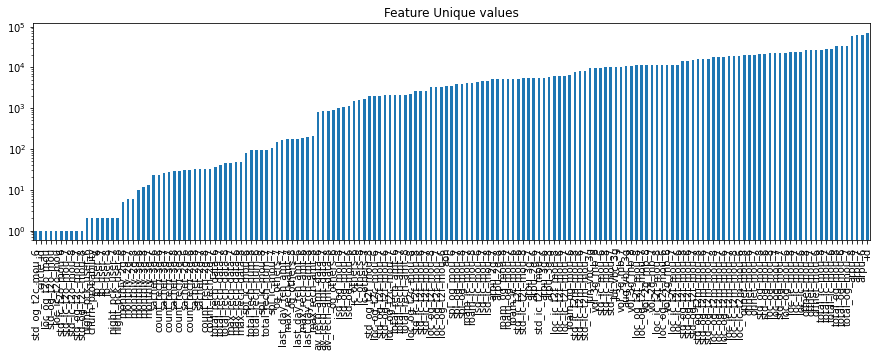

In [715]:
# now investigate numerical features, find how many unique values, binary(2 unique values),ordinal(3-10)
# or continous(>10 values)
unique_values = telecom_df.select_dtypes(include="number").nunique().sort_values()

# plot with y-axis in log scale for visiblity
unique_values.plot.bar(logy=True, figsize=(15,4), title='Feature Unique values')
# Conclusion -  Below columns with just 1 unique values are good to drop including the ones we got in above step

cols_to_drop = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
                'loc_ic_t2o_mou','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
                'std_ic_t2o_mou_8' ,'std_og_t2c_mou_7' ,'std_og_t2c_mou_8']

In [716]:
unique_values[0:30]

std_og_t2c_mou_6      1
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
std_ic_t2o_mou_6      1
std_ic_t2o_mou_7      1
std_ic_t2o_mou_8      1
std_og_t2c_mou_7      1
std_og_t2c_mou_8      1
night_pck_user_6      2
churn_probability     2
fb_user_6             2
fb_user_7             2
fb_user_8             2
night_pck_user_7      2
night_pck_user_8      2
monthly_2g_6          5
monthly_2g_7          6
monthly_2g_8          6
monthly_3g_6         10
monthly_3g_8         12
monthly_3g_7         13
sachet_3g_6          23
count_rech_3g_6      23
sachet_3g_7          26
count_rech_3g_7      27
sachet_3g_8          28
count_rech_3g_8      29
sachet_2g_6          30
dtype: int64

## Data Quality Investigation

In [717]:
# Do we have Duplicate records ?
n_duplicates = telecom_df.drop(labels=['id'],axis=1).duplicated().sum()
print(n_duplicates)

# conclusion - no duplicates, unique IDs

0


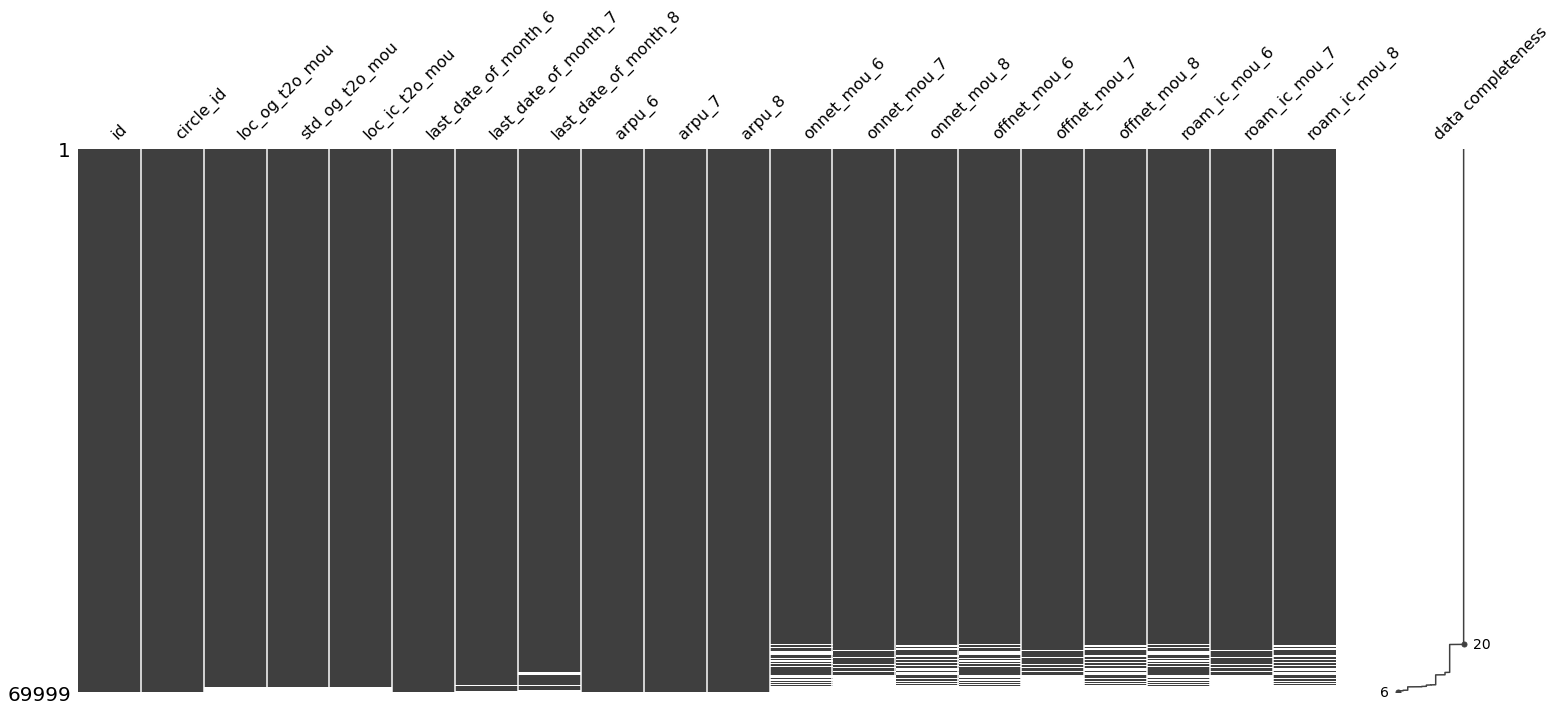

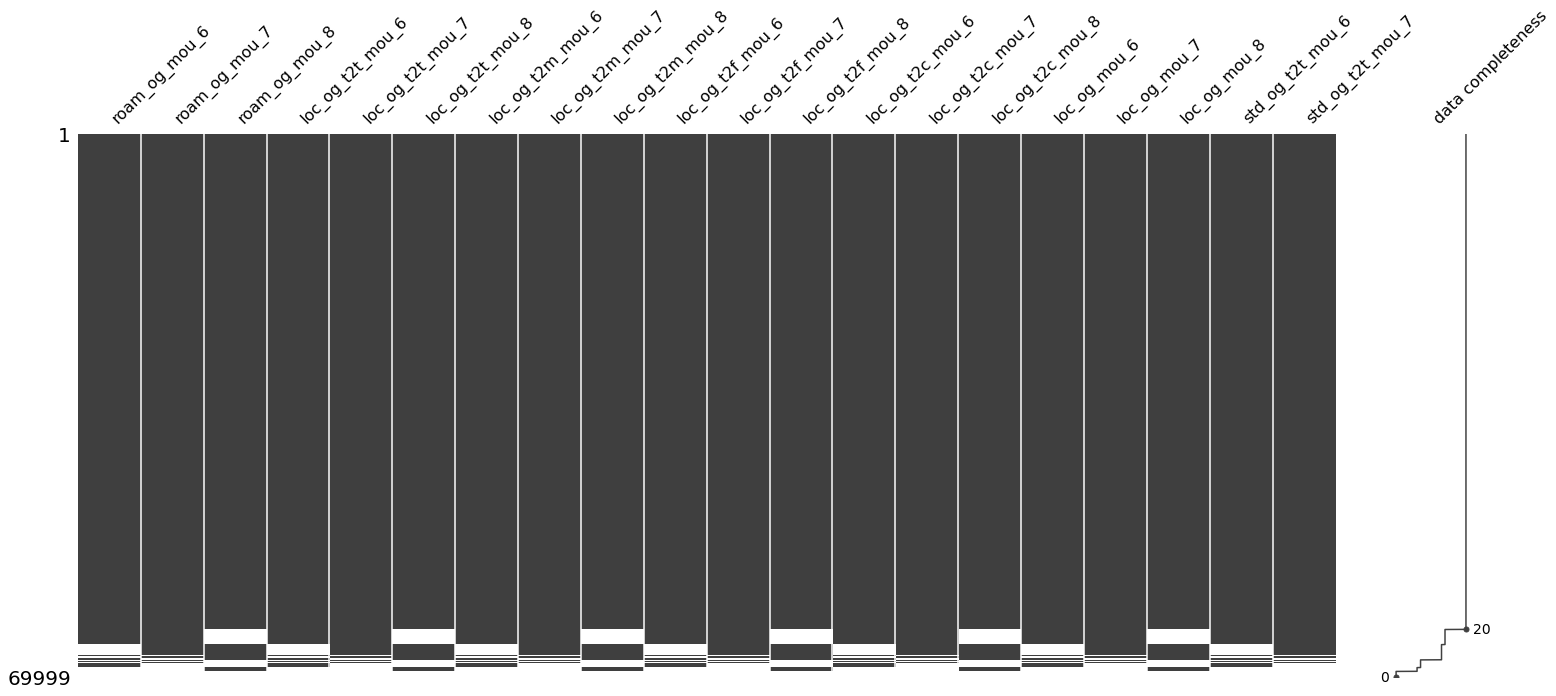

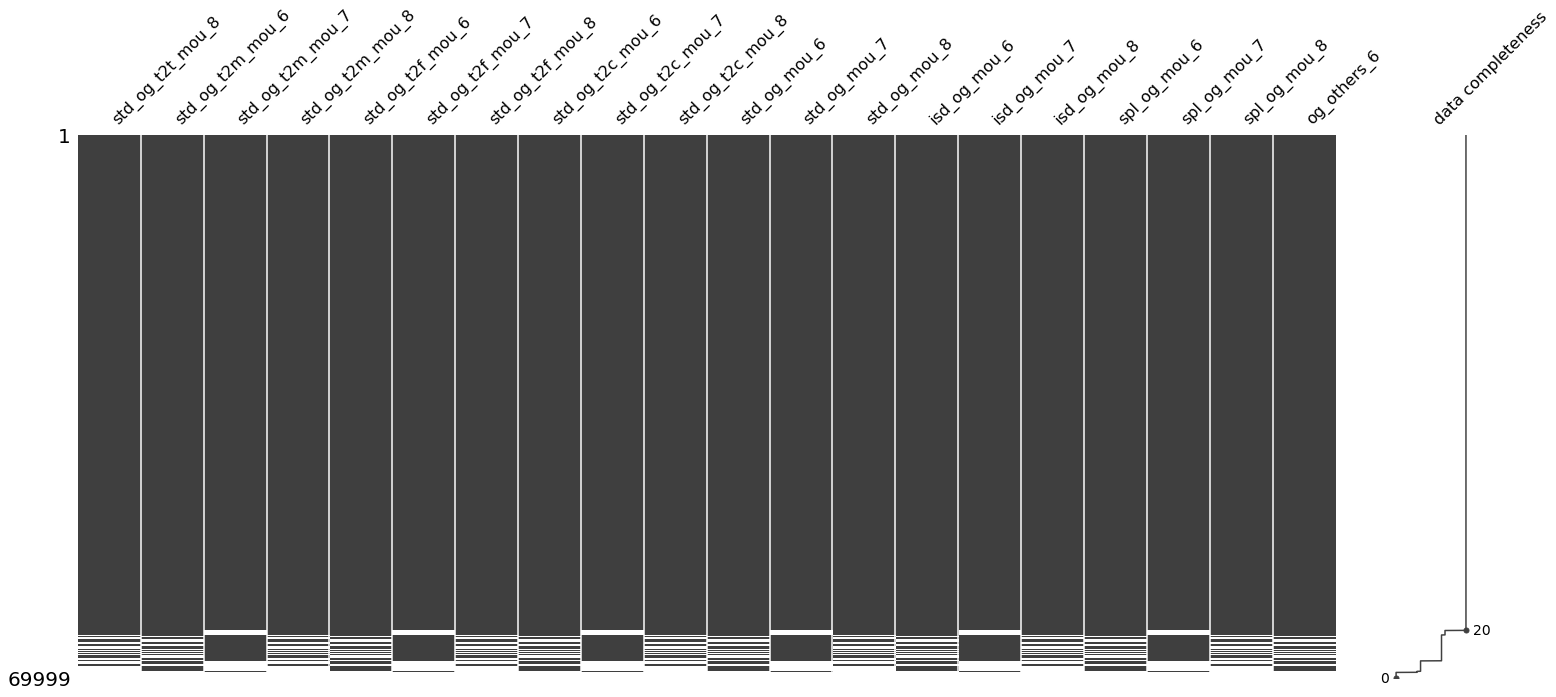

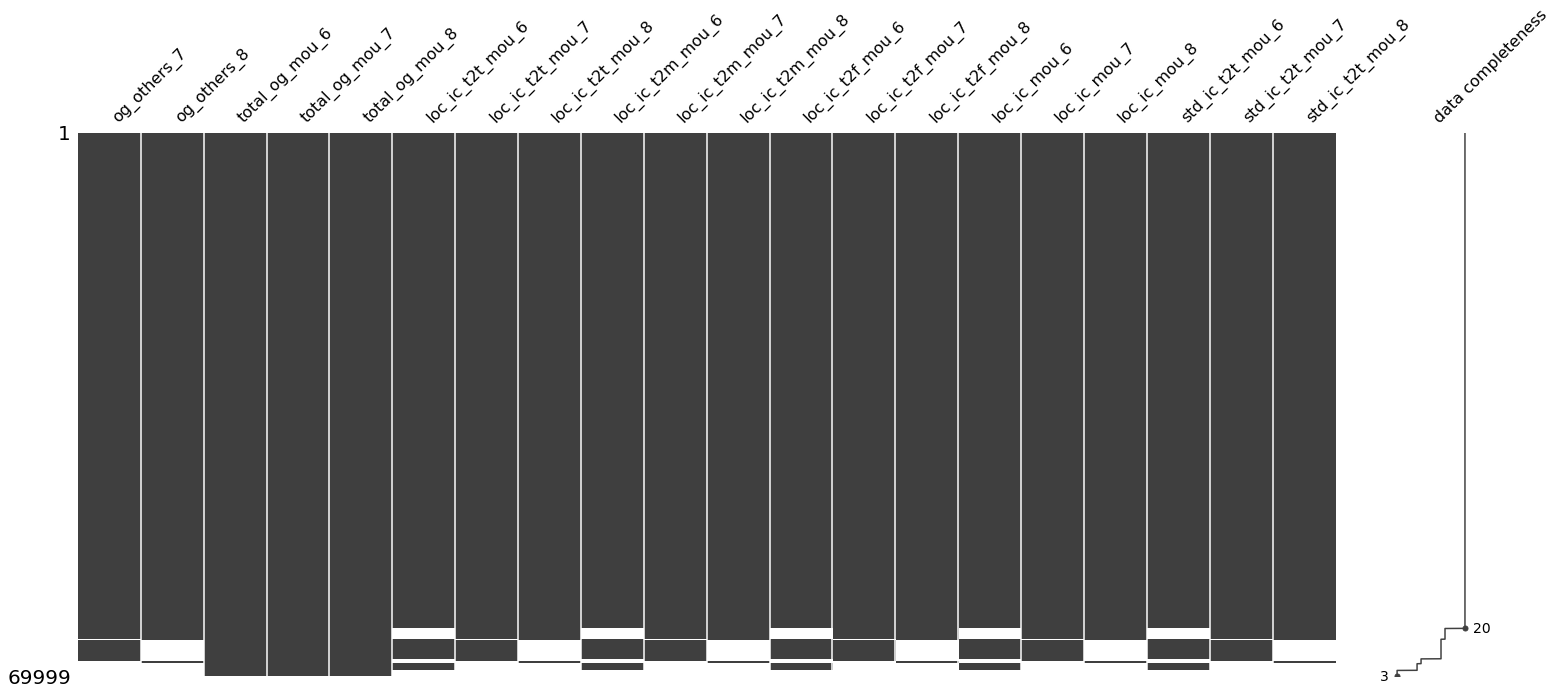

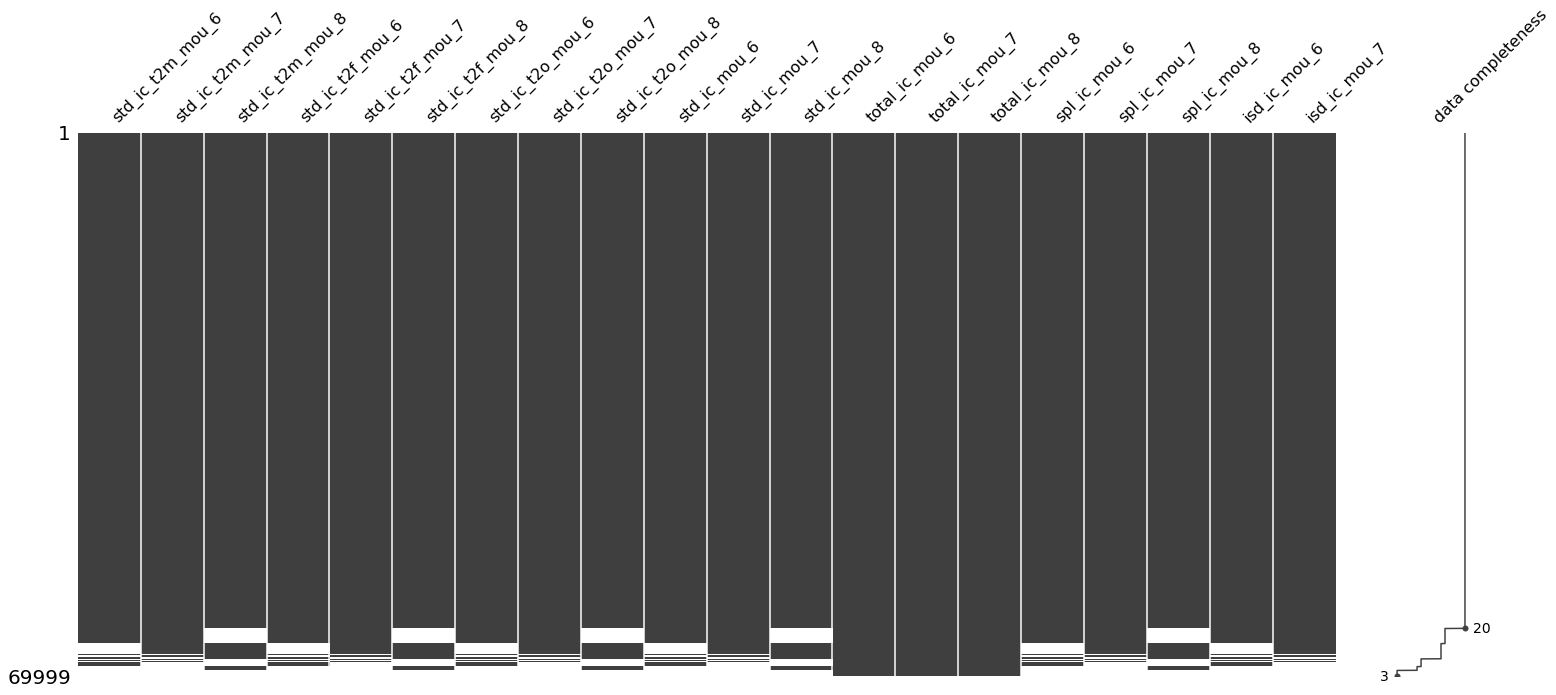

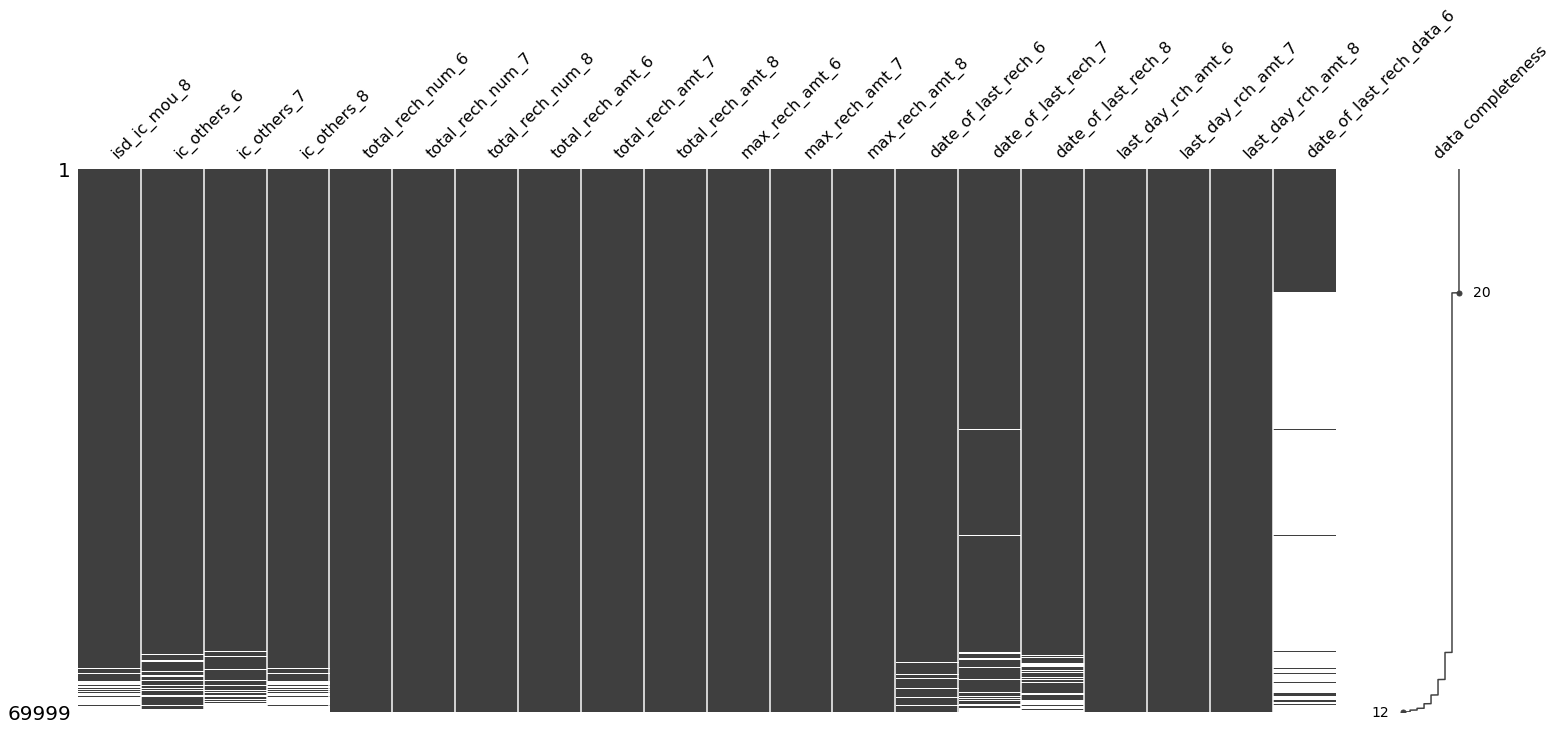

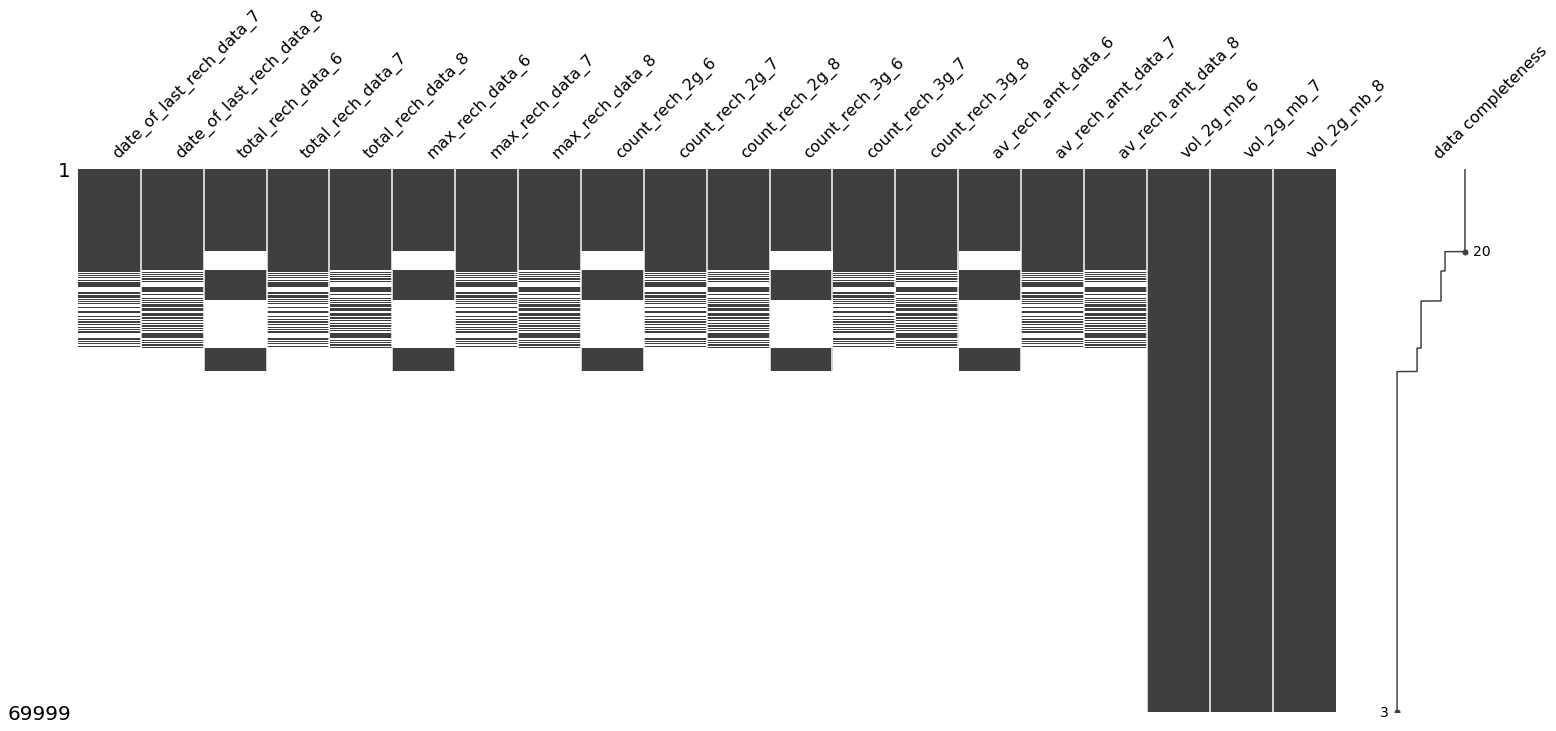

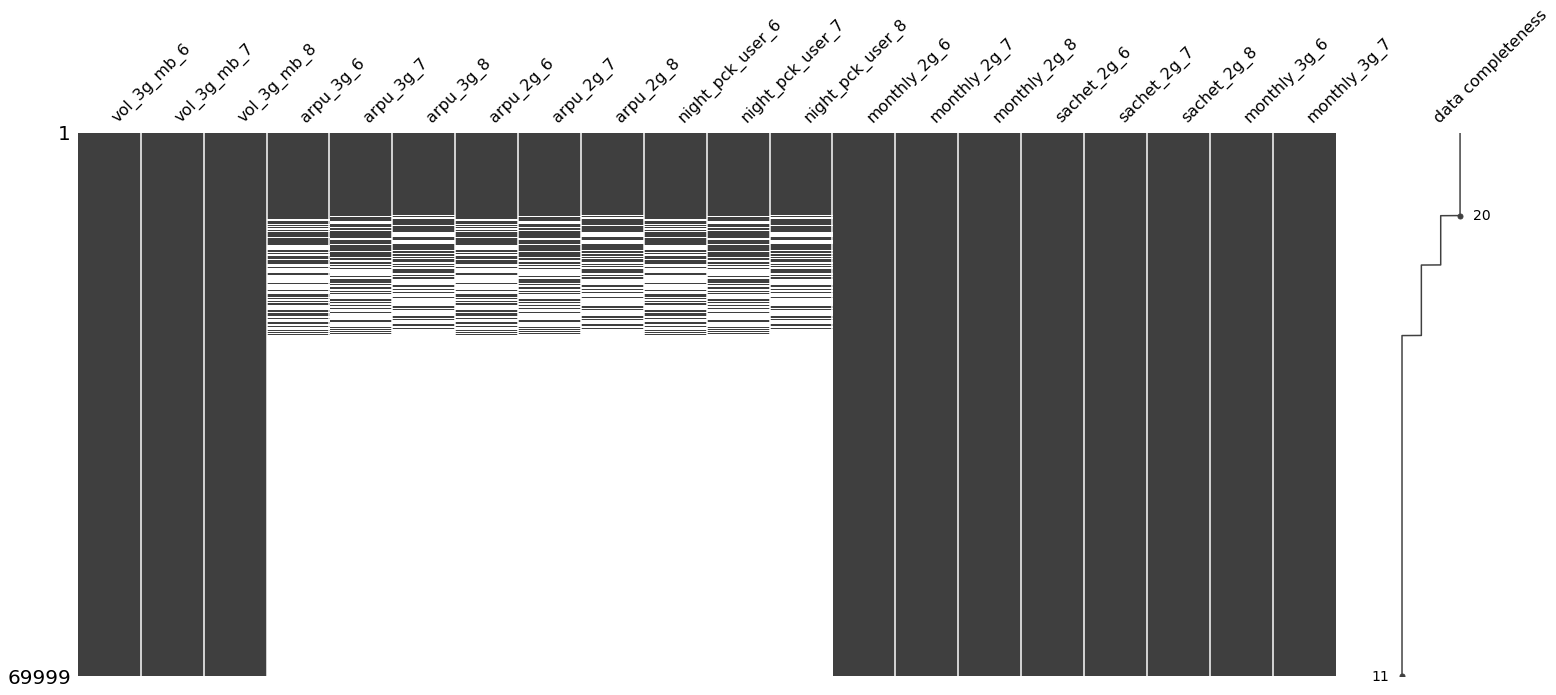

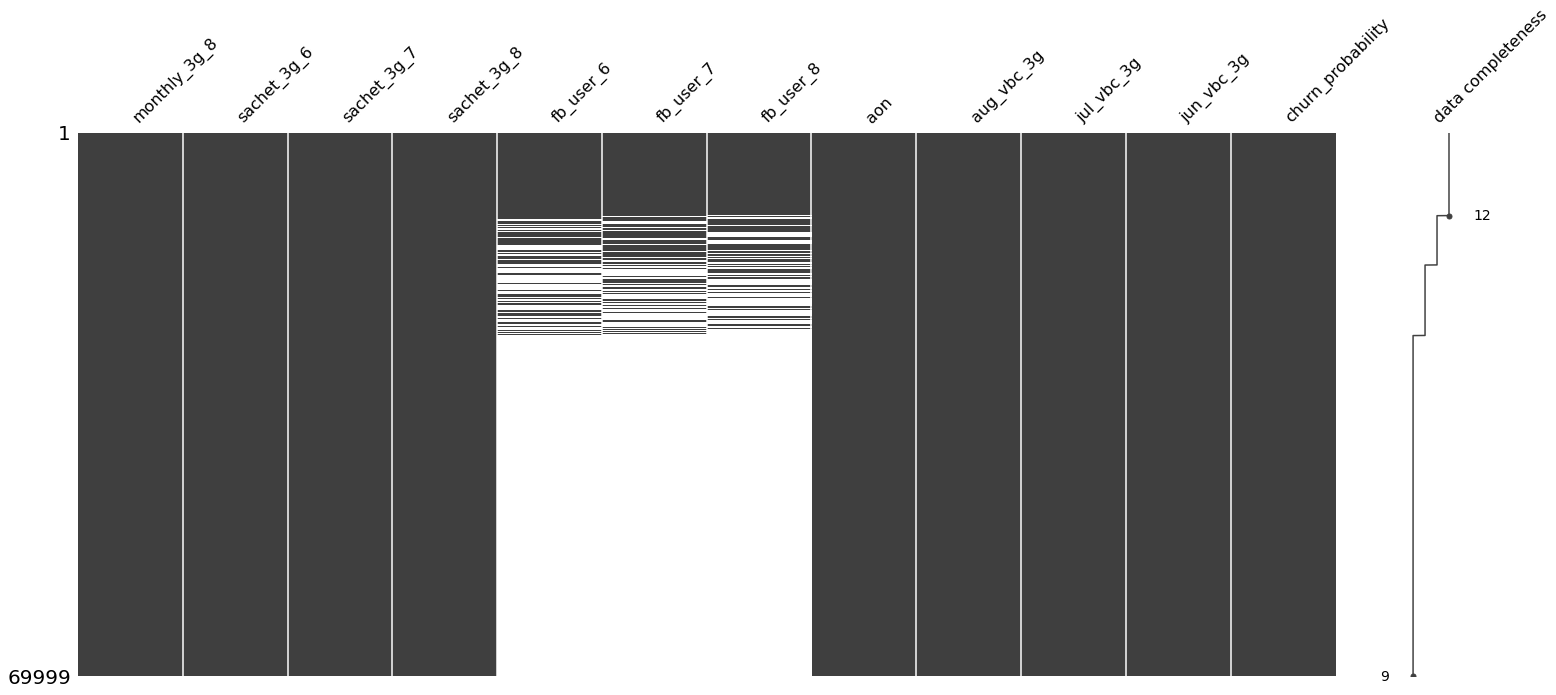

In [718]:
# Let us find any missing values across features for samples - horizontal investigation
import missingno as msno
for i in range(0,len(telecom_df.columns),20):
   msno.matrix(telecom_df.iloc[:,i:i+20],labels=True,sort="descending")

# conclusion - there are quite a few holes vertically

In [719]:
telecom_df['fb_user_6'].value_counts()

1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64

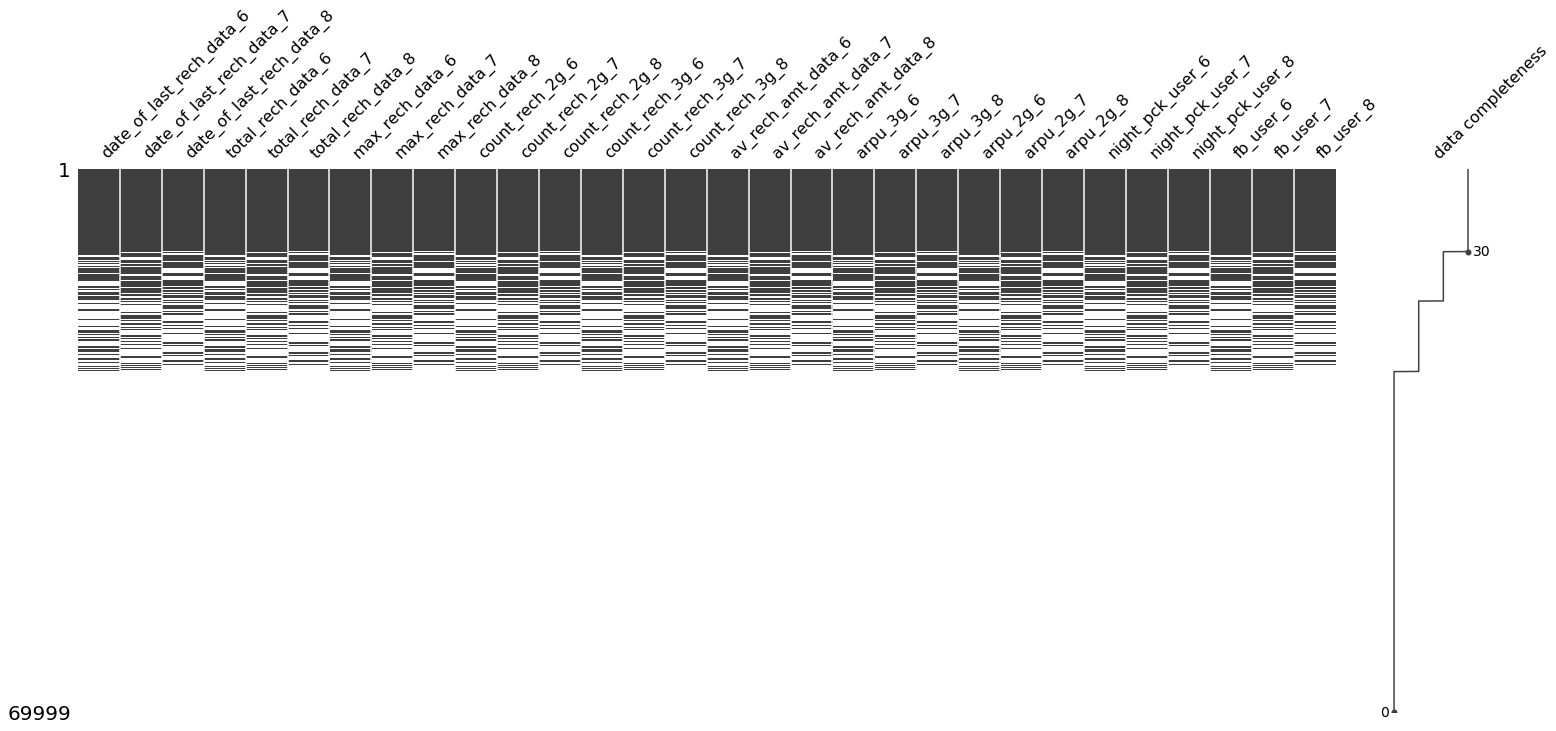

In [720]:
missing_cols = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8',
'total_rech_data_6','total_rech_data_7','total_rech_data_8',
'max_rech_data_6','max_rech_data_7','max_rech_data_8',
'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8',
'arpu_3g_6','arpu_3g_7','arpu_3g_8',
'arpu_2g_6','arpu_2g_7','arpu_2g_8',
'night_pck_user_6','night_pck_user_7','night_pck_user_8',
'fb_user_6','fb_user_7','fb_user_8']

msno.matrix(telecom_df[missing_cols],labels=True,sort="descending")


In [721]:
new_cols_to_drop = cols_to_drop + missing_cols
new_tel_df = telecom_df.drop(columns=new_cols_to_drop)

In [722]:
new_tel_df.shape

(69999, 129)

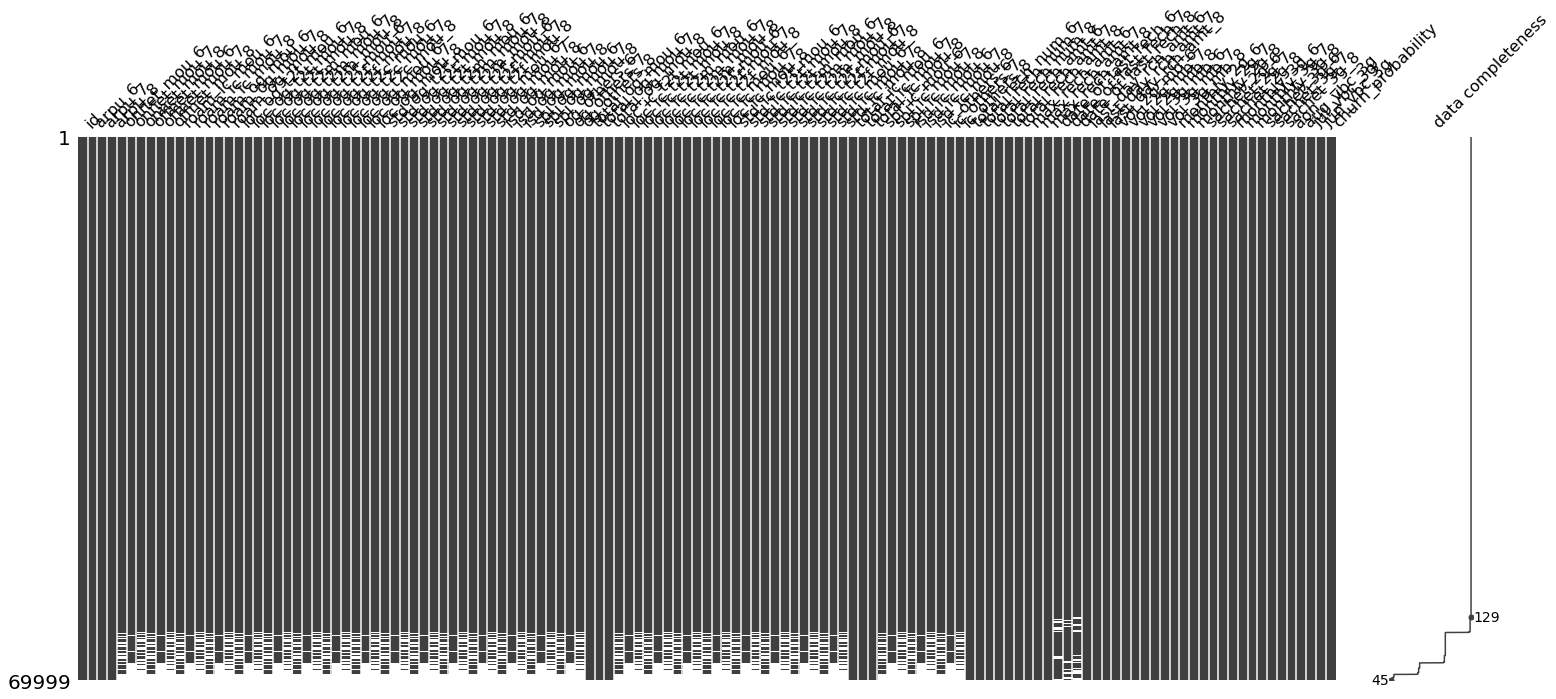

In [723]:
 msno.matrix(new_tel_df,labels=True,sort="descending")

In [724]:
#new_tel_df = new_tel_df.dropna()
new_tel_df = new_tel_df.fillna(new_tel_df.mean())

In [725]:
new_tel_df.shape

(69999, 129)

In [726]:
for i in new_tel_df.columns:
    print(i)

id
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou

In [727]:
# Check if data is now clean
nan_cols = new_tel_df.columns[new_tel_df.isnull().any()].tolist()
print(nan_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [728]:
catCols = [col for col in new_tel_df.columns if new_tel_df[col].dtype=="O"]
print(catCols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [729]:
new_tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 129 entries, id to churn_probability
dtypes: float64(99), int64(27), object(3)
memory usage: 68.9+ MB


In [730]:
new_tel_df['date_of_last_rech_7'].value_counts()
df_dictionary

,Description
Acronyms,
CIRCLE_ID,Telecom circle area to which the customer belo...
LOC,Local calls within same telecom circle
STD,STD calls outside the calling circle
IC,Incoming calls
OG,Outgoing calls
T2T,Operator T to T ie within same operator mobile...
T2M,Operator T to other operator mobile
T2O,Operator T to other operator fixed line
T2F,Operator T to fixed lines of T


In [731]:
import datetime

In [732]:
# Let us concvert DateTime columns i.e. 3 categorical columns into Day number in the year.

#for cols in catCols:
    #new_tel_df[cols] = new_tel_df[cols].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y').timetuple().tm_yday)
  
for cols in catCols:
    month=cols.split("_")[-1]
    fill_str = "0" + month + "/" + "15" + "/" + "2014"
    new_tel_df[cols]  = new_tel_df[cols].fillna(fill_str)
    new_tel_df[cols] = new_tel_df[cols].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y').timetuple().tm_yday)
    print(new_tel_df[cols].value_counts())

181    11880
180     9049
178     7800
179     6752
177     3918
176     3402
175     2888
168     2887
165     2686
172     2654
174     2060
169     1886
163     1746
166     1706
173     1624
164     1468
170     1387
171     1252
167      783
162      398
159      368
156      229
158      223
161      200
154      172
152      155
160      135
157      123
155       90
153       78
Name: date_of_last_rech_6, dtype: int64
212    12206
211     9716
206     6577
210     6320
209     5370
208     4136
207     3765
205     2750
196     2336
200     2144
203     2061
201     1999
198     1915
197     1687
204     1590
202     1138
199      864
190      590
191      581
193      478
195      312
192      278
194      239
187      217
185      169
189      146
184      113
188      109
186       94
182       53
183       46
Name: date_of_last_rech_7, dtype: int64
243    10324
242     8187
241     6995
240     6843
238     6525
237     5469
236     5375
239     4012
227     3035
234     14

In [733]:
new_tel_df.shape

(69999, 129)

In [734]:
new_tel_df['date_of_last_rech_6']

0        173
1        163
2        162
3        166
4        176
        ... 
69994    169
69995    179
69996    176
69997    180
69998    170
Name: date_of_last_rech_6, Length: 69999, dtype: int64

# Data Clean-up Completed, let us look into EDA

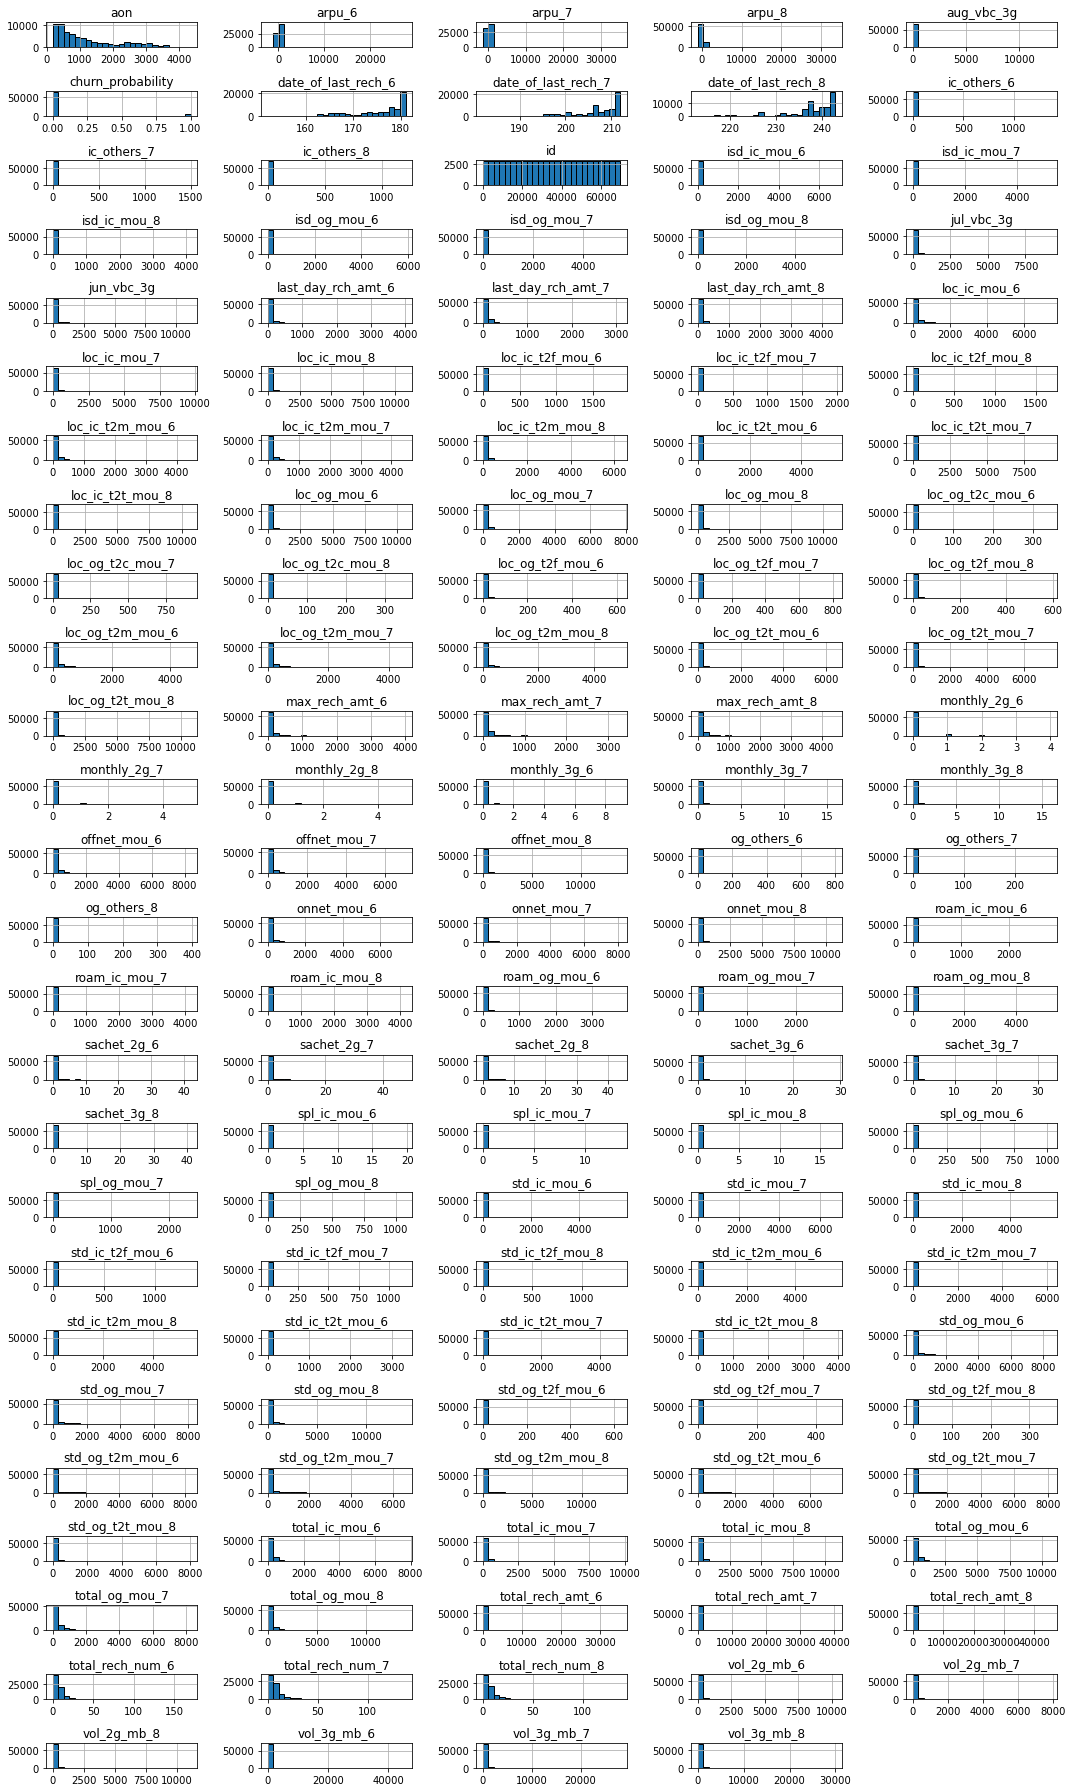

In [735]:
# Feature disrtibution using hist
new_tel_df.hist(bins=25,figsize=(15,25),layout=(-1,5),edgecolor='black')
plt.tight_layout()

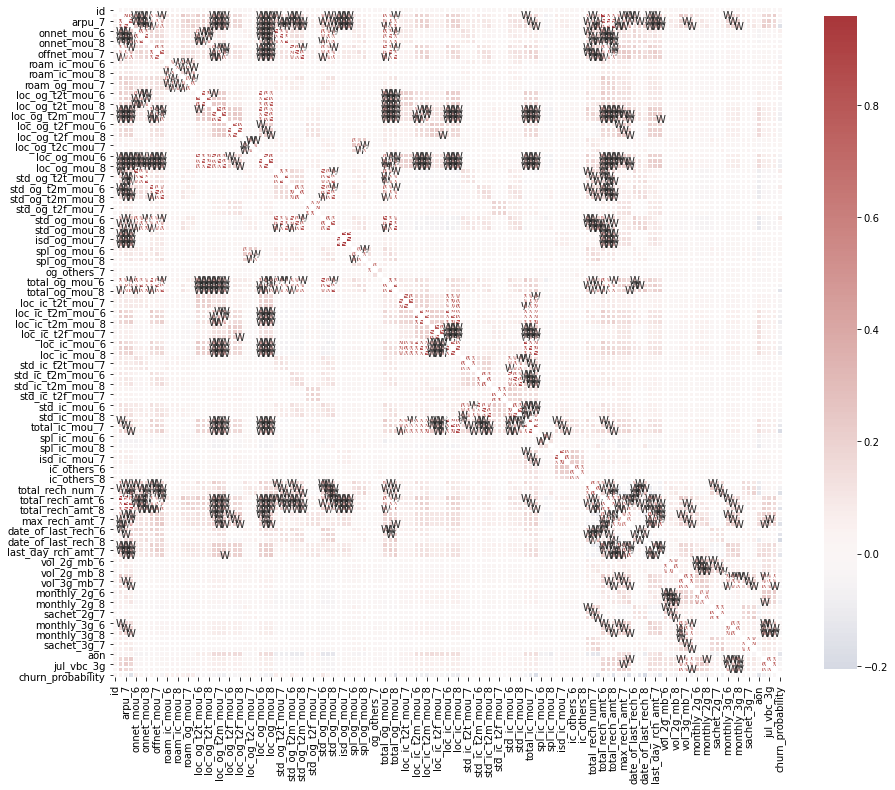

In [736]:
# Let us plot corelation matrix
df_corr = new_tel_df.corr(method="pearson")

labels = np.where(np.abs(df_corr)>0.75,"S",np.where(np.abs(df_corr)>0.5, "M",
                                                   np.where(np.abs(df_corr)>0.25, "W", "")))

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True, center=0, annot=labels,
           fmt='', linewidths=0.5, cmap="vlag", cbar_kws={"shrink":0.8})

In [737]:
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")
#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()
#  Showing the lowest and highest correlations in the correlation matrix
print_full_df(df_corr_stacked)

churn_probability    date_of_last_rech_8   -2.054531e-01
                     total_ic_mou_8        -1.875655e-01
                     total_rech_num_8      -1.670428e-01
                     total_rech_amt_8      -1.604548e-01
                     max_rech_amt_8        -1.591309e-01
                     arpu_8                -1.575664e-01
                     total_og_mou_8        -1.493253e-01
                     date_of_last_rech_7   -1.460421e-01
                     last_day_rch_amt_8    -1.396107e-01
aon                  total_rech_num_8      -1.358564e-01
churn_probability    aon                   -1.351769e-01
max_rech_amt_6       total_rech_num_8      -1.307877e-01
aon                  std_og_mou_7          -1.282104e-01
                     std_og_mou_8          -1.270558e-01
                     std_og_mou_6          -1.258759e-01
last_day_rch_amt_6   total_rech_num_8      -1.251953e-01
aon                  total_rech_num_7      -1.246842e-01
churn_probability    total_ic_m

In [738]:
# conclusion from corelation matrix 
# last few features where corelation index is > 0.88 are worth reviewing and we can drop
# Also drop 'id' column that is no more required.

high_corr_cols_to_drop = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
                     'isd_og_mou_7','isd_og_mou_8','arpu_6','arpu_7','arpu_8','id']

In [739]:
new_tel_df = new_tel_df.drop(columns=high_corr_cols_to_drop)
new_tel_df.shape

(69999, 120)

In [740]:
'''
# Total mou at good phase incoming and outgoing
new_tel_df['total_mou_good'] = (new_tel_df['total_og_mou_6'] + new_tel_df['total_ic_mou_6'])

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
new_tel_df['avg_mou_action'] = (new_tel_df['total_og_mou_7'] + 
                          new_tel_df['total_og_mou_8'] + new_tel_df['total_ic_mou_7'] 
                                  + new_tel_df['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
new_tel_df['diff_mou'] = new_tel_df['avg_mou_action'] - new_tel_df['total_mou_good']
# Checking whether the mou has decreased in action phase
new_tel_df['decrease_mou_action'] = np.where((new_tel_df['diff_mou'] < 0), 1, 0)
print(new_tel_df['decrease_mou_action'].value_counts())
'''

"\n# Total mou at good phase incoming and outgoing\nnew_tel_df['total_mou_good'] = (new_tel_df['total_og_mou_6'] + new_tel_df['total_ic_mou_6'])\n\n# Avg. mou at action phase\n# We are taking average because there are two months(7 and 8) in action phase\nnew_tel_df['avg_mou_action'] = (new_tel_df['total_og_mou_7'] + \n                          new_tel_df['total_og_mou_8'] + new_tel_df['total_ic_mou_7'] \n                                  + new_tel_df['total_ic_mou_8'])/2\n\n# Difference avg_mou_good and avg_mou_action\nnew_tel_df['diff_mou'] = new_tel_df['avg_mou_action'] - new_tel_df['total_mou_good']\n# Checking whether the mou has decreased in action phase\nnew_tel_df['decrease_mou_action'] = np.where((new_tel_df['diff_mou'] < 0), 1, 0)\nprint(new_tel_df['decrease_mou_action'].value_counts())\n"

In [741]:
# List the columns of total mou, rech_num and rech_amt
[total for total in new_tel_df.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [742]:
def find_trend(row):  
    if (row['total_rech_amt_6'] - row['total_rech_amt_7'] < 0 
        and row['total_rech_amt_7'] - row['total_rech_amt_8'] <= 0):
        return 1
    elif (row['total_rech_amt_6'] - row['total_rech_amt_7'] > 0 
        and row['total_rech_amt_7'] - row['total_rech_amt_8'] <= 0):
        return 2
    elif (row['total_rech_amt_6'] - row['total_rech_amt_7'] > 0 
        and row['total_rech_amt_7'] - row['total_rech_amt_8'] >= 0):
        return 3
    elif (row['total_rech_amt_6'] - row['total_rech_amt_7'] <= 0 
        and row['total_rech_amt_7'] - row['total_rech_amt_8'] > 0):
        return 4
    else:
        return 5

In [743]:
new_tel_df['spending_trend'] = new_tel_df[
    ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].apply(lambda row: find_trend(row), axis=1)

In [744]:
print(new_tel_df['spending_trend'])

0        3
1        4
2        4
3        4
4        3
        ..
69994    1
69995    4
69996    2
69997    3
69998    2
Name: spending_trend, Length: 69999, dtype: int64


In [745]:
# Check if we have significant outliers 
describe_df = new_tel_df.describe().T

describe_df['IQR'] = describe_df['75%'] - describe_df['25%']

for col in describe_df.index:
    W1 = new_tel_df[col].quantile(.25) - 1.5 * describe_df.loc[col,'IQR']
    W2 = new_tel_df[col].quantile(.75) + 1.5 * describe_df.loc[col,'IQR']
    describe_df.loc[col,'Whisker1'] = W1
    describe_df.loc[col,'Whisker2'] = W2
    filt = (new_tel_df[col] < W1 ) | (new_tel_df[col] > W2)
    describe_df.loc[col,'max_outliers_value'] = round(new_tel_df[filt][col].max(),2)
    describe_df.loc[col,'min_outliers_value'] = round(new_tel_df[filt][col].min(),2)
    describe_df.loc[col,'no_of_outliers'] = len(new_tel_df[filt][col])
describe_df['no_of_outliers'] = describe_df['no_of_outliers'].astype('int')
describe_df = describe_df.sort_values(by=['no_of_outliers'])
print_full_df(describe_df)

# Conclusion - there are outliers, let us remove anything outside 2%-98%  

,count,mean,std,min,25%,50%,75%,max,IQR,Whisker1,Whisker2,max_outliers_value,min_outliers_value,no_of_outliers
spending_trend,69999.0,2.739539,1.225411,1.0,2.000,3.00,4.000000,5.00,2.000000,-1.000000,7.000000,NaN,NaN,0
aon,69999.0,1220.639709,952.426321,180.0,468.000,868.00,1813.000000,4337.00,1345.000000,-1549.500000,3830.500000,4337.00,3834.00,61
date_of_last_rech_6,69999.0,174.984557,6.191401,152.0,171.000,178.00,180.000000,181.00,9.000000,157.500000,193.500000,157.00,152.00,847
last_day_rch_amt_8,69999.0,62.489478,101.996729,0.0,0.000,30.00,130.000000,4449.00,130.000000,-195.000000,325.000000,4449.00,330.00,1190
last_day_rch_amt_7,69999.0,59.294218,95.429492,0.0,0.000,30.00,110.000000,3100.00,110.000000,-165.000000,275.000000,3100.00,279.00,1283
last_day_rch_amt_6,69999.0,63.426949,97.954876,0.0,0.000,30.00,110.000000,4010.00,110.000000,-165.000000,275.000000,4010.00,279.00,1306
date_of_last_rech_7,69999.0,206.320505,5.879572,182.0,203.000,208.00,211.000000,212.00,8.000000,191.000000,223.000000,190.00,182.00,1537
max_rech_amt_8,69999.0,107.540351,124.396750,0.0,30.000,98.00,144.000000,4449.00,114.000000,-141.000000,315.000000,4449.00,325.00,2538
max_rech_amt_7,69999.0,104.137573,120.782543,0.0,30.000,110.00,128.000000,3299.00,98.000000,-117.000000,275.000000,3299.00,279.00,2823
sachet_3g_7,69999.0,0.081444,0.634547,0.0,0.000,0.00,0.000000,33.00,0.000000,0.000000,0.000000,33.00,1.00,2898


In [746]:
Q1 = new_tel_df.quantile(0.02)
Q3 = new_tel_df.quantile(0.98)

print("Shape Before removing Outliers  : {}".format(new_tel_df.shape))
#new_tel_df = new_tel_df.drop(columns=['id'])
IQR = Q3 - Q1
##display(IQR)
new_tel_df_temp = new_tel_df[~((new_tel_df < (Q1 - 1.5 * IQR)) |(new_tel_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#telecom_df = telecom_df[~((telecom_df[interested_columns] < (Q1 - 1.5 * IQR)) |(telecom_df[interested_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape After removing Outliers  : {}".format(new_tel_df_temp.shape))


Shape Before removing Outliers  : (69999, 121)
Shape After removing Outliers  : (57459, 121)


# Data is clean, now let us create train , test data

In [747]:
X = new_tel_df_temp.drop("churn_probability", axis = 1)
y = new_tel_df_temp['churn_probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# let us take care class imbalancing
from imblearn.over_sampling import SMOTE

over = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = over.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(43094, 120) (43094,) (14365, 120) (14365,)
(77290, 120) (77290,) (14365, 120) (14365,)


In [748]:
# From Unseen data in test.csv, we should convert dates to number of day in the year , similar to what we did for train data

for cols in catCols:
    month=cols.split("_")[-1]
    fill_str = "0" + month + "/" + "15" + "/" + "2014"
    telecom_df_test[cols]  = telecom_df_test[cols].fillna(fill_str)
    telecom_df_test[cols] = telecom_df_test[cols].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y').timetuple().tm_yday)
    print(telecom_df_test[cols].value_counts())

181    5080
180    3869
178    3369
179    2739
177    1612
176    1494
168    1258
175    1241
165    1159
172    1093
169     861
174     848
166     774
163     765
173     720
164     679
170     622
171     551
167     343
162     181
159     152
158      99
156      98
161      83
160      64
152      63
154      61
157      50
155      41
153      31
Name: date_of_last_rech_6, dtype: int64
212    5082
211    4147
206    2824
210    2732
209    2132
208    1773
207    1617
205    1248
196     993
200     913
203     908
201     893
198     822
197     771
204     712
202     502
199     416
191     278
193     254
190     237
195     140
192     130
187      96
194      85
185      82
189      55
188      44
184      40
186      31
183      22
182      21
Name: date_of_last_rech_7, dtype: int64
243    4382
242    3520
241    3062
240    2973
238    2772
236    2347
237    2186
239    1676
227    1400
232     625
234     596
235     544
231     476
233     411
230     300
226     

In [749]:
'''
# Total mou at good phase incoming and outgoing
telecom_df_test['total_mou_good'] = (telecom_df_test['total_og_mou_6'] + telecom_df_test['total_ic_mou_6'])

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
telecom_df_test['avg_mou_action'] = (telecom_df_test['total_og_mou_7'] + 
                          telecom_df_test['total_og_mou_8'] + telecom_df_test['total_ic_mou_7'] 
                                  + telecom_df_test['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
telecom_df_test['diff_mou'] = telecom_df_test['avg_mou_action'] - telecom_df_test['total_mou_good']
# Checking whether the mou has decreased in action phase
telecom_df_test['decrease_mou_action'] = np.where((telecom_df_test['diff_mou'] < 0), 1, 0)
print(telecom_df_test['decrease_mou_action'].value_counts())
'''

telecom_df_test['spending_trend'] = telecom_df_test[
    ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].apply(lambda row: find_trend(row), axis=1)

In [750]:
X_unseen = telecom_df_test[X.columns]
print(X_unseen.shape)

(30000, 120)


In [751]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_scale = X_train.columns.to_list()
X_train_sdf = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_sdf, columns=cols_scale)

X_test_sdf = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_sdf, columns=cols_scale)


X_unseen_sdf = scaler.transform(X_unseen)
X_unseen = pd.DataFrame(X_unseen_sdf, columns=cols_scale)

y_train_array = y_train.values.reshape(-1,1)

In [752]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape,X_unseen.shape)

(77290, 120) (77290,) (14365, 120) (14365,) (30000, 120)


## Let us write generic functions to train, test and evaluate models

In [753]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier

In [754]:
def logigistic_regression(X_train,y_train):
    model = LogisticRegression()
    model.fit(X_train,y_train)
    return model

def linear_svc(X_train,y_train,c=1.0,max_iter=1000):
    model = LinearSVC(C=c,max_iter=max_iter)
    model.fit(X_train,y_train)
    return model

def decision_tree(X_train,y_train,max_depth=5,max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(X_train,y_train)
    return model

def randomforest(X_train,y_train,max_depth=5,max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(X_train,y_train)
    return model

def catboostmodel(X_train,y_train):
    model = CatBoostClassifier(verbose=False, random_state=42)
    model.fit(X_train, y_train)
    return model



In [755]:
def score_model(y_test,y_pred):
    

    # Confusion metrics
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(confusion)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    Accuracy = accuracy_score(y_test,y_pred)
    Precision= precision_score(y_test,y_pred)
    Recall = recall_score(y_test,y_pred)
    Sensitivity = TP / float(TP+FN)
    Specificity = TN / float(TN+FP)
    False_positive_rate = (round(FP/ float(TN+FP), 4) * 100)
    True_positive_rate = (round(TP / float(TP+FP), 4)* 100)
    True_negative_rate = (round(TN / float(TN+ FN), 4) * 100)
    F1_score = f1_score(y_test, y_pred, average="macro")
    classification_err_rate = (round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100)
    
    results = { 'accuracy' : Accuracy,
                'precision' : Precision,
                'recall'  :  Recall,
                'sensitivity' :Sensitivity,
                'sensitivity' :   Specificity,
                'false_positive_rate' :True_positive_rate,
                'true_positive_rate' : True_negative_rate,
                'true_negative_rate' : True_negative_rate ,
                'f1_score' : F1_score ,
                'Classification_error_rate': classification_err_rate,
               }
    return results


In [756]:
def create_models(classifier,X_train,y_train,X_test,y_test,scale=False):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =test_size, random_state = 4, stratify = y)
    
    if scale:
        scaler = StandardScaler()
        cols_scale = X_train.columns.to_list()
        X_train_sdf = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(X_train_sdf, columns=cols_scale)
        X_test = scaler.transform(X_test)
    
    
    model = classifier(X_train,y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    display(y_pred_train)
    display(y_pred_train)
    
    y_train_pred = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_pred_train})
    y_test_pred = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_pred_test})
    
    y_train_pred['predicted'] = y_train_pred['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
    y_test_pred['predicted'] = y_test_pred['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
    
    summary_train = score_model(y_train,y_train_pred['predicted'])
    summary_test = score_model(y_test,y_test_pred['predicted'])
    
    
    prediction_results = pd.DataFrame({'y_test' : y_test,
                                       'y_pred' : y_test_pred['predicted']},
                                    )
    model_crosstab = pd.crosstab(prediction_results['y_pred'],prediction_results['y_test'])
    
    model_results  = { 'training' : summary_train,
                       'test'     : summary_test,
                       'confusion_matrix' : model_crosstab,
                     }
    return model,model_results

#  Let us build differnt models without PCA using above functions

In [757]:
import statsmodels.api as sm
logreg_without_pca = sm.GLM(y_train_array,(sm.add_constant(X_train)), family=sm.families.Binomial())
logreg_without_pca = logreg_without_pca.fit()
logreg_without_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                77290
Model:                            GLM   Df Residuals:                    77169
Model Family:                Binomial   Df Model:                          120
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 19 Mar 2023   Deviance:                          nan
Time:                        10:42:52   Pearson chi2:                 1.95e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.6113      0.083    -31.460      0.000      -2.774      -2.449
onnet_mou_6            -0.5301      2.064     -0.257      0.797      -4.575       3.514
onnet_mou_7            -1.9782      0.994     -1.990      0.047      -3.927      -0.030
onnet_mou_8            -2.0545      0.937     -2.193      0.028      -3.890      -0.219
offnet_mou_6            0.5092      2.167      0.235      0.814      -3.738       4.757
offnet_mou_7           -2.3417      0.974     -2.404      0.016      -4.251      -0.432
offnet_mou_8           -3.0170      0.953     -3.165      0.002      -4.885      -1.149
roam_ic_mou_6          -0.0459      0.018     -2.545      0.011      -0.081      -0.011
roam_ic_mou_7           0.0903      0.017      5.378      0.000       0.057       0.123
roam_ic_mou_8           0.1027      0.016      6.274      0.000       0.071       0.135
roam_og_mou_6          -0.0131      0.286     -0.046      0.964      -0.574       0.548
roam_og_mou_7           0.2087      0.105      1.983      0.047       0.002       0.415
roam_og_mou_8           0.6151      0.114      5.406      0.000       0.392       0.838
loc_og_t2t_mou_6      993.7581    141.535      7.021      0.000     716.355    1271.161
loc_og_t2t_mou_7      987.3585    129.786      7.608      0.000     732.983    1241.734
loc_og_t2t_mou_8     1368.1853    130.601     10.476      0.000    1112.212    1624.158
loc_og_t2m_mou_6     1862.9562    265.392      7.020      0.000    1342.797    2383.116
loc_og_t2m_mou_7     1807.8673    237.661      7.607      0.000    1342.061    2273.674
loc_og_t2m_mou_8     2550.7995    243.428     10.479      0.000    2073.690    3027.909
loc_og_t2f_mou_6      106.4666     15.166      7.020      0.000      76.741     136.192
loc_og_t2f_mou_7      110.7173     14.555      7.607      0.000      82.190     139.245
loc_og_t2f_mou_8      151.9679     14.497     10.483      0.000     123.555     180.381
loc_og_t2c_mou_6       -0.0140      0.015     -0.960      0.337      -0.042       0.015
loc_og_t2c_mou_7        0.0482      0.015      3.209      0.001       0.019       0.078
loc_og_t2c_mou_8        0.1225      0.015      8.309      0.000       0.094       0.151
loc_og_mou_6        -3142.4795    362.995     -8.657      0.000   -3853.936   -2431.023
loc_og_mou_7        -2473.7447    325.210     -7.607      0.000   -3111.144   -1836.345
loc_og_mou_8        -3489.1301    332.916    -10.481      0.000   -4141.633   -2836.627
std_og_t2t_mou_6    -4172.0784    715.117     -5.834      0.000   -5573.682   -2770.474
std_og_t2t_mou_7    -4291.3579    664.244     -6.461      0.000   -5593.252   -2989.464
std_og_t2t_mou_8     -980.7603    594.618     -1.649      0.099   -2146.190     184.669
std_og_t2m_mou_6    -4064.2618    696.473     -5.835      0.000   -5429.323   -2699.201
std

In [758]:
## Feature selection using RFE

# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=30)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

# RFE selected columns
rfe_cols = X_train.columns[rfe.support_].tolist()
print(rfe_cols)

['offnet_mou_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'std_og_t2t_mou_6', 'std_og_t2m_mou_8', 'total_og_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_7', 'max_rech_amt_7', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_8', 'aon']


In [759]:
# Adding constant to X_train
X_train_sm_rfe = sm.add_constant(X_train[rfe_cols])
print(X_train_sm_rfe.shape)
#Instantiate the model
logreg_without_pca_rfe = sm.GLM(y_train_array, X_train_sm_rfe, family=sm.families.Binomial())

# Fit the model
logreg_without_pca_rfe = logreg_without_pca_rfe.fit()

logreg_without_pca_rfe.summary()

(77290, 31)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                77290
Model:                            GLM   Df Residuals:                    77259
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25788.
Date:                Sun, 19 Mar 2023   Deviance:                       51576.
Time:                        10:44:14   Pearson chi2:                 4.30e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1921      0.017    -11.270      0.000      -0.225      -0.159
offnet_mou_6            0.7928      0.040     19.716      0.000       0.714       0.872
offnet_mou_8           -0.5507      0.055    -10.037      0.000      -0.658      -0.443
roam_og_mou_8           0.5045      0.013     37.940      0.000       0.478       0.531
loc_og_t2t_mou_7        0.2904      0.023     12.611      0.000       0.245       0.336
loc_og_t2t_mou_8       -0.2870      0.033     -8.782      0.000      -0.351      -0.223
std_og_t2t_mou_6        0.7012      0.037     18.967      0.000       0.629       0.774
std_og_t2m_mou_8        0.4550      0.047      9.756      0.000       0.364       0.546
total_og_mou_6         -1.0454      0.057    -18.375      0.000      -1.157      -0.934
loc_ic_t2t_mou_8        0.7453      0.029     25.853      0.000       0.689       0.802
loc_ic_t2m_mou_7        0.2566      0.023     11.057      0.000       0.211       0.302
loc_ic_t2m_mou_8        1.5061      0.044     34.285      0.000       1.420       1.592
std_ic_mou_8            0.6771      0.017     40.159      0.000       0.644       0.710
total_ic_mou_8         -3.6862      0.049    -74.876      0.000      -3.783      -3.590
spl_ic_mou_8           -0.4994      0.019    -26.760      0.000      -0.536      -0.463
isd_ic_mou_8            0.3260      0.012     27.734      0.000       0.303       0.349
total_rech_num_8       -0.3759      0.019    -20.114      0.000      -0.413      -0.339
total_rech_amt_7        0.3725      0.021     17.513      0.000       0.331       0.414
max_rech_amt_7         -0.2804      0.018    -15.726      0.000      -0.315      -0.245
date_of_last_rech_8    -0.3780      0.014    -27.437      0.000      -0.405      -0.351
last_day_rch_amt_8     -0.6333      0.016    -39.408      0.000      -0.665      -0.602
vol_2g_mb_7             0.1767      0.015     11.878      0.000       0.148       0.206
vol_3g_mb_7             0.2997      0.019     15.679      0.000       0.262       0.337
monthly_2g_6           -0.2551      0.019    -13.688      0.000      -0.292      -0.219
monthly_2g_7           -0.4286      0.023    -18.264      0.000      -0.475      -0.383
monthly_2g_8           -0.3545      0.025    -14.345      0.000      -0.403      -0.306
sachet_2g_8            -0.4408      0.022    -20.454      0.000      -0.483      -0.399
monthly_3g_6           -0.2703      0.017    -16.294      0.000      -0.303      -0.238
monthly_3g_7           -0.2855      0.020    -14.627      0.000      -0.324      -0.247
sachet_3g_8            -0.2767      0.022    -12.524      0.000      -0.320      -0.233
aon                    -0.3818      0.013    -29.619      0.000      -0.407      -0.357
=======================================================================================
"""

In [760]:
# From above all the P=Values are optimal So let see if we need to remove anything usingVIF. Ideally VIF > 5 should be dropped and VIF=5 may need to review and VIF<5 is significant
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# As you can see there are few features with VIF > 5, those can be dropped

,Features,VIF
7,total_og_mou_6,17.74
0,offnet_mou_6,9.28
1,offnet_mou_8,8.71
5,std_og_t2t_mou_6,7.86
12,total_ic_mou_8,7.08
6,std_og_t2m_mou_8,6.88
10,loc_ic_t2m_mou_8,5.33
16,total_rech_amt_7,3.15
4,loc_og_t2t_mou_8,3.07
3,loc_og_t2t_mou_7,2.65


In [761]:
rfe_cols_to_drop = ['offnet_mou_8','std_og_t2m_mou_8','loc_og_t2m_mou_8',
                    'onnet_mou_7','std_og_t2t_mou_7','total_rech_amt_8']

rfe_cols = list(set(rfe_cols) - set(rfe_cols_to_drop))
print(rfe_cols)

['loc_og_t2t_mou_8', 'vol_3g_mb_7', 'loc_ic_t2m_mou_8', 'monthly_2g_8', 'loc_ic_t2m_mou_7', 'sachet_2g_8', 'total_og_mou_6', 'std_ic_mou_8', 'sachet_3g_8', 'date_of_last_rech_8', 'total_rech_amt_7', 'total_rech_num_8', 'monthly_2g_6', 'total_ic_mou_8', 'offnet_mou_6', 'isd_ic_mou_8', 'std_og_t2t_mou_6', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_7', 'max_rech_amt_7', 'monthly_2g_7', 'monthly_3g_6', 'aon', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_3g_7', 'vol_2g_mb_7']


In [762]:
# Adding constant to X_train
X_train_sm_rfe = sm.add_constant(X_train[rfe_cols])
print(X_train_sm_rfe.shape)
#Instantiate the model
logreg_without_pca_rfe = sm.GLM(y_train_array, X_train_sm_rfe, family=sm.families.Binomial())

# Fit the model
logreg_without_pca_rfe = logreg_without_pca_rfe.fit()

logreg_without_pca_rfe.summary()

(77290, 29)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                77290
Model:                            GLM   Df Residuals:                    77261
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25844.
Date:                Sun, 19 Mar 2023   Deviance:                       51688.
Time:                        10:44:21   Pearson chi2:                 5.81e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1836      0.017    -10.765      0.000      -0.217      -0.150
loc_og_t2t_mou_8       -0.3625      0.033    -11.070      0.000      -0.427      -0.298
vol_3g_mb_7             0.3021      0.019     15.835      0.000       0.265       0.340
loc_ic_t2m_mou_8        1.3297      0.041     32.689      0.000       1.250       1.409
monthly_2g_8           -0.3526      0.025    -14.283      0.000      -0.401      -0.304
loc_ic_t2m_mou_7        0.2638      0.023     11.402      0.000       0.218       0.309
sachet_2g_8            -0.4385      0.022    -20.375      0.000      -0.481      -0.396
total_og_mou_6         -1.0386      0.057    -18.292      0.000      -1.150      -0.927
std_ic_mou_8            0.6744      0.017     40.417      0.000       0.642       0.707
sachet_3g_8            -0.2770      0.022    -12.545      0.000      -0.320      -0.234
date_of_last_rech_8    -0.3806      0.014    -27.619      0.000      -0.408      -0.354
total_rech_amt_7        0.3525      0.020     17.216      0.000       0.312       0.393
total_rech_num_8       -0.3906      0.018    -22.057      0.000      -0.425      -0.356
monthly_2g_6           -0.2557      0.019    -13.710      0.000      -0.292      -0.219
total_ic_mou_8         -3.6493      0.049    -74.341      0.000      -3.745      -3.553
offnet_mou_6            0.7738      0.040     19.524      0.000       0.696       0.851
isd_ic_mou_8            0.3221      0.012     27.500      0.000       0.299       0.345
std_og_t2t_mou_6        0.7155      0.037     19.366      0.000       0.643       0.788
roam_og_mou_8           0.4733      0.013     36.838      0.000       0.448       0.498
loc_ic_t2t_mou_8        0.7511      0.029     25.982      0.000       0.694       0.808
loc_og_t2t_mou_7        0.2921      0.023     12.721      0.000       0.247       0.337
max_rech_amt_7         -0.2879      0.018    -16.353      0.000      -0.322      -0.253
monthly_2g_7           -0.4286      0.023    -18.271      0.000      -0.475      -0.383
monthly_3g_6           -0.2705      0.017    -16.292      0.000      -0.303      -0.238
aon                    -0.3890      0.013    -30.271      0.000      -0.414      -0.364
spl_ic_mou_8           -0.4984      0.019    -26.672      0.000      -0.535      -0.462
last_day_rch_amt_8     -0.6560      0.016    -41.540      0.000      -0.687      -0.625
monthly_3g_7           -0.2822      0.019    -14.483      0.000      -0.320      -0.244
vol_2g_mb_7             0.1810      0.015     12.163      0.000       0.152       0.210
=======================================================================================
"""

In [763]:
# From above all the P=Values are optimal So let see if we need to remove anything usingVIF. Ideally VIF > 5 should be dropped and VIF=5 may need to review and VIF<5 is significant
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# As you can see there are few features with VIF > 5, those can be dropped

,Features,VIF
6,total_og_mou_6,17.66
14,offnet_mou_6,9.04
16,std_og_t2t_mou_6,7.83
13,total_ic_mou_8,6.69
2,loc_ic_t2m_mou_8,4.42
10,total_rech_amt_7,2.98
0,loc_og_t2t_mou_8,2.92
19,loc_og_t2t_mou_7,2.64
4,loc_ic_t2m_mou_7,2.57
20,max_rech_amt_7,2.18


In [764]:
# Predict the vales for the training module using the RFE selected columns 
y_train_pred_no_pca = logreg_without_pca_rfe.predict(X_train_sm_rfe)
y_train_pred_no_pca.head()

0    0.265098
1    0.287781
2    0.000294
3    0.532598
4    0.197943
dtype: float64

In [765]:
# assign the this to a DF the actual and the probability value .
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

y_train_pred_final.head()

,churn,churn_prob
0,1,0.265098
1,0,0.287781
2,0,0.000294
3,0,0.532598
4,0,0.197943


In [766]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff  since it is a binary classification that is the thump rule 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,predicted
0,1,0.265098,0
1,0,0.287781,0
2,0,0.000294,0
3,0,0.532598,1
4,0,0.197943,0


In [767]:
#You can see that both the Predicted and the ground truth is mostly same 
y_train_pred_final['churn'].value_counts()

1    38645
0    38645
Name: churn, dtype: int64

In [768]:
y_train_pred_final['predicted'].value_counts()

1    39260
0    38030
Name: predicted, dtype: int64

In [769]:
y_train_pred_final[y_train_pred_final['churn'] != y_train_pred_final['predicted']]['churn'].value_counts()

0    5295
1    4680
Name: churn, dtype: int64

In [770]:
# Importing metrics modules 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[33350  5295]
 [ 4680 33965]]


In [771]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [772]:
(round(TP / float(TP+FP), 4)* 100)

86.50999999999999

In [773]:
# Accuracy
print("Accuracy                    :",(round( (TP+TN) / float(TP+FP+TN+FN), 4)* 100))
# Sensitivity
print("Sensitivity                 :",TP / float(TP+FN))
# Specificity
print("Specificity                 :", TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
#It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative
print("False Positive Rate         :", round(FP/ float(TN+FP), 4) * 100)
# positive predictive value 
print("Positive Predictive Value   :",round(TP / float(TP+FP), 4)* 100)

# Negative predictive value
print("Positive Predictive Value   :",round(TN / float(TN+ FN), 4) * 100)
print("Classification Error Rate   :",(round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100))

print("-----------------------------")
print("Using sklean inbuild modules")
print("-----------------------------")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1 score                    :",f1_score(y_train_pred_final['churn'], y_train_pred_final['predicted'], average="macro"))
print("Accuracy                    :",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))
print("Precision score             :",precision_score(y_train_pred_final['churn'], y_train_pred_final['predicted'], average="macro"))
print("Recall score                :",recall_score(y_train_pred_final['churn'], y_train_pred_final['predicted'], average="macro"))

Accuracy                    : 87.09
Sensitivity                 : 0.8788976581705266
Specificity                 : 0.8629835683788329
False Positive Rate         : 13.700000000000001
Positive Predictive Value   : 86.50999999999999
Positive Predictive Value   : 87.69
Classification Error Rate   : 12.91
-----------------------------
Using sklean inbuild modules
-----------------------------
f1 score                    : 0.8709324414185495
Accuracy                    : 0.8709406132746798
Precision score             : 0.8710345808447604
Recall score                : 0.8709406132746798


In [774]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

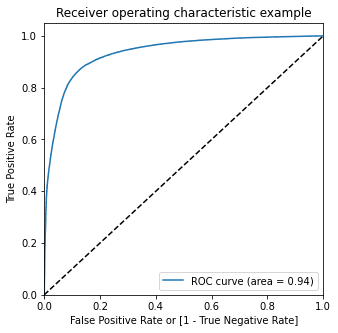

In [775]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [776]:
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]

print(X_train_rfe.shape,X_test_rfe.shape )

(77290, 28) (14365, 28)


In [777]:
models_results = {}
lr_model_without_pca_rfe,models_results['LogisticRegression_RFE'] = create_models(
    logigistic_regression,X_train_rfe,y_train,X_test_rfe,y_test)

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[33350  5295]
 [ 4679 33966]]
[[11247  1635]
 [  249  1234]]


In [778]:
svc_model_without_pca_rfe,models_results['SVC_RFE'] = create_models(
    linear_svc,X_train_rfe,y_train,X_test_rfe,y_test)

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[33162  5483]
 [ 4642 34003]]
[[11169  1713]
 [  246  1237]]


In [779]:
decisiontree_model_without_pca_rfe,models_results['DecisionTree_RFE'] = create_models(
    decision_tree,X_train_rfe,y_train,X_test_rfe,y_test)

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[34917  3728]
 [ 3902 34743]]
[[11653  1229]
 [  307  1176]]


In [780]:
randonforest_model_without_pca_rfe,models_results['RandomForest_RFE'] = create_models(
    randomforest,X_train_rfe,y_train,X_test_rfe,y_test)

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[34917  3728]
 [ 3902 34743]]
[[11653  1229]
 [  307  1176]]


In [781]:
decisiontree_model_without_pca,models_results['DecisionTree_Allfields'] = create_models(
    decision_tree,X_train,y_train,X_test,y_test) 

array([1, 0, 0, ..., 1, 1, 1])

array([1, 0, 0, ..., 1, 1, 1])

[[34633  4012]
 [ 3384 35261]]
[[11563  1319]
 [  293  1190]]


In [782]:
randonforest_model_without_pca,models_results['RandomForest_Allfields'] = create_models(
    randomforest,X_train,y_train,X_test,y_test) 


array([1, 0, 0, ..., 1, 1, 1])

array([1, 0, 0, ..., 1, 1, 1])

[[34633  4012]
 [ 3384 35261]]
[[11563  1319]
 [  293  1190]]


In [783]:
svc_model_without_pca,models_results['SVC_Allfields'] = create_models(linear_svc,X_train,y_train,X_test,y_test)

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[33645  5000]
 [ 4770 33875]]
[[11281  1601]
 [  270  1213]]


In [784]:
lr_model_without_pca,models_results['LogisticRegression_Allfields'] = create_models(
    logigistic_regression,X_train,y_train,X_test,y_test)

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[33671  4974]
 [ 4690 33955]]
[[11292  1590]
 [  277  1206]]


## Train Models with PCA

[0.12068622 0.20065088 0.24933397 0.28998698 0.32621566 0.35931455
 0.38926565 0.41705504 0.43936432 0.46060559 0.48017546 0.49886327
 0.51658139 0.53336284 0.54921304 0.56441068 0.57868375 0.59218317
 0.60509977 0.61719538 0.62883493 0.64028665 0.65147693 0.66240746
 0.67316102 0.68371097 0.69388839 0.70334842 0.7126685  0.72156974
 0.73002225 0.73840439 0.74664895 0.75441951 0.76208289 0.76956769
 0.7767308  0.78365732 0.7904905  0.79717088 0.80359752 0.80990848
 0.81607703 0.82220005 0.82826325 0.83415809 0.83995094 0.84571164
 0.85138506 0.85698148 0.86225252 0.86736782 0.87244303 0.87741583
 0.88226449 0.88698544 0.8916313  0.89619245 0.90063807 0.90506113
 0.9094358  0.91358893 0.91753345 0.9213057  0.92496623 0.9284865
 0.93196713 0.93543377 0.93870355 0.94194016 0.94508056 0.94817647
 0.95118463 0.95417319 0.95707861 0.95984384 0.96247082 0.96497677
 0.96741326 0.96981026 0.9721753  0.97448638 0.97677684 0.97902517
 0.98111577 0.98311056 0.98504012 0.98693302 0.98872261 0.99033

Text(0, 0.5, 'Cumulative Variance')

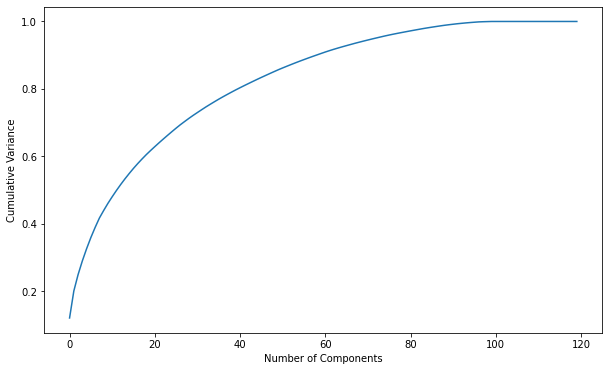

In [785]:
#Import PCA
from sklearn.decomposition import PCA
# Instantiate PCA
pca = PCA(random_state=42)
X_train.describe()
# Fit train set on PCA
pca.fit(X_train)
pca.components_
# Cumuliative varinace of the PCs
cumu_var = np.cumsum(pca.explained_variance_ratio_)
print(cumu_var)
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(cumu_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [786]:
# Importing incremental PCA
from sklearn.decomposition import PCA
# Instantiate PCA with 90 components as that gives a good 90% cover
pca_final = PCA(.95)
# Fit and transform the X_train
X_pca = pca_final.fit_transform(X)
#X_test_pca  = pca_final.transform(X_test)

In [787]:
print(X_pca.shape)

(57459, 16)


In [788]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca  = pca_final.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(77290, 73)
(14365, 73)


In [789]:
pd.DataFrame(X_train_pca)

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-3.480002,-0.625275,-0.155417,-1.063510,0.710172,0.340790,-0.234098,-1.358592,-0.613867,-0.670304,...,0.290899,0.457999,0.360736,0.483662,-0.166375,0.062208,0.120681,0.244918,-0.197618,0.335860
1,5.311247,12.275986,2.853190,-1.426499,-1.449125,7.056780,-8.660371,0.340715,-1.849674,0.885014,...,0.498334,-0.651931,0.541786,0.444056,-0.176966,-0.426846,0.047944,-0.254840,-0.142858,0.011871
2,0.596998,2.587229,2.847101,2.291057,9.160094,0.430952,2.350999,2.258657,3.638572,0.596358,...,-0.175400,-1.746404,-1.996333,2.303627,-0.039929,-2.597895,-0.745452,0.022132,-3.027532,-1.755816
3,-2.670845,-1.068778,4.147900,0.121712,-0.875063,-1.249678,0.122126,1.018559,-0.113192,-0.620935,...,-0.238292,-0.320563,1.405500,-2.004548,-1.057266,-0.310371,0.619666,-0.547593,-0.196273,0.169657
4,-0.351664,2.898966,0.716645,-1.488152,1.092748,0.479263,1.858284,0.210178,-1.163721,-0.359883,...,0.063079,0.109261,-0.173282,-0.289516,-0.152403,0.056657,-0.341125,-0.133399,0.132158,0.137617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77285,1.126163,4.176803,1.007224,0.445896,4.782439,4.171872,-0.040496,2.997456,0.693194,-1.014802,...,-0.012411,0.926665,0.264526,-0.345395,-0.411793,0.648719,0.239091,-0.061442,0.321739,-0.409017
77286,1.136449,-0.645596,-3.277944,-0.270872,-2.077966,-0.390073,0.052051,2.807792,1.969905,-1.446613,...,0.877011,-0.516215,-0.562393,0.379627,-0.637726,0.678949,0.203004,-1.143456,0.729766,0.384199
77287,-1.330045,0.506242,-2.859836,1.507081,-1.347818,0.714013,-0.226679,3.505557,-0.015314,-0.061754,...,0.129023,0.143305,-0.070958,0.117258,0.210284,0.167351,0.102587,0.086226,-0.101630,0.675843
77288,0.352078,3.925392,0.317259,-2.031681,-1.159650,-2.574470,3.640677,-0.891074,-2.102762,0.598034,...,0.152080,-0.292478,0.260797,-0.095229,-0.597490,1.673381,0.009493,0.141384,-0.018612,-0.144420


In [790]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [791]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.217853,0.019012,0.009065,0.001991,0.01,{'C': 0.01},0.866027,0.871089,0.864499,0.866727,...,0.866345,0.002643,6,0.866848,0.866682,0.865934,0.867256,0.867769,0.866898,0.000611
1,0.217863,0.008518,0.007987,0.000425,0.1,{'C': 0.1},0.866546,0.870959,0.864499,0.866469,...,0.866449,0.002503,5,0.867009,0.866844,0.865870,0.867386,0.868189,0.867060,0.000755
2,0.219045,0.017023,0.007908,0.000612,1,{'C': 1},0.866416,0.870830,0.864629,0.866469,...,0.866449,0.002408,1,0.866977,0.866811,0.865773,0.867386,0.868125,0.867014,0.000769
3,0.220286,0.011789,0.007761,0.000239,10,{'C': 10},0.866416,0.870830,0.864629,0.866469,...,0.866449,0.002408,1,0.866977,0.866811,0.865773,0.867386,0.868157,0.867021,0.000778
4,0.213611,0.007736,0.007681,0.000022,100,{'C': 100},0.866416,0.870830,0.864629,0.866469,...,0.866449,0.002408,1,0.866977,0.866811,0.865773,0.867386,0.868157,0.867021,0.000778
5,0.220030,0.013181,0.007843,0.000292,1000,{'C': 1000},0.866416,0.870830,0.864629,0.866469,...,0.866449,0.002408,1,0.866977,0.866811,0.865773,0.867386,0.868157,0.867021,0.000778


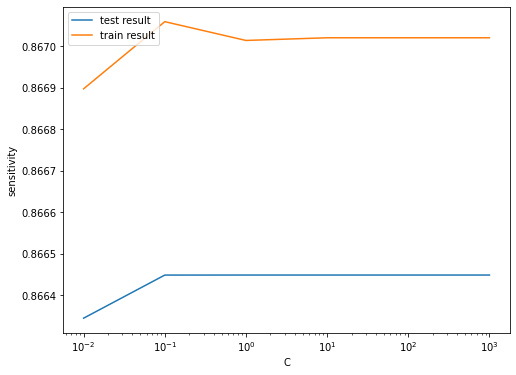

In [792]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [793]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8664491242416139 at C = 1


In [794]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)
# Fit the model on the train set
logistic_pca_model = logistic_pca.fit(X_train_pca, y_train)
# Predictions on the train set
y_train_pred = logistic_pca_model.predict(X_train_pca)
pdf = pd.DataFrame(y_train_pred)
pdf[0].value_counts()

1    38748
0    38542
Name: 0, dtype: int64

In [795]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred})
y_train_pred_final.head()

,churn,churn_prob
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [796]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[33395  5250]
 [ 5147 33498]]


In [797]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [798]:
# Accuracy
print("Accuracy                    :",(round( (TP+TN) / float(TP+FP+TN+FN), 4)* 100))
# Sensitivity
print("Sensitivity                 :",TP / float(TP+FN))
# Specificity
print("Specificity                 :", TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
#It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative
print("False Positive Rate         :", round(FP/ float(TN+FP), 4) * 100)
# positive predictive value 
print("Positive Predictive Value   :",round(TP / float(TP+FP), 4)* 100)

# Negative predictive value
print("Positive Predictive Value   :",round(TN / float(TN+ FN), 4) * 100)
print("Classification Error Rate   :",(round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100))

print("-----------------------------")
print("Using sklean inbuild modules")
print("-----------------------------")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1 score                    :",f1_score(y_train,y_train_pred, average="macro"))
print("Accuracy                    :",metrics.accuracy_score(y_train,y_train_pred))
print("Precision score             :",precision_score(y_train,y_train_pred, average="macro"))
print("Recall score                :",recall_score(y_train,y_train_pred, average="macro"))

Accuracy                    : 86.55000000000001
Sensitivity                 : 0.8668133005563462
Specificity                 : 0.8641480139733472
False Positive Rate         : 13.59
Positive Predictive Value   : 86.45
Positive Predictive Value   : 86.65
Classification Error Rate   : 13.450000000000001
-----------------------------
Using sklean inbuild modules
-----------------------------
f1 score                    : 0.8654804183663909
Accuracy                    : 0.8654806572648467
Precision score             : 0.8654832535674484
Recall score                : 0.8654806572648467


In [799]:
# Predictions on the test  set
y_test_pred = logistic_pca_model.predict(X_test_pca)

In [800]:
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_prob':y_test_pred})
y_test_pred_final.head(5)

,churn,churn_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [801]:
y_test_pred_final['churn_prob'].value_counts()

0    11500
1     2865
Name: churn_prob, dtype: int64

In [802]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[11205  1677]
 [  295  1188]]


In [803]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [804]:
# Accuracy
print("Accuracy                    :",(round( (TP+TN) / float(TP+FP+TN+FN), 4)* 100))
# Sensitivity
print("Sensitivity                 :",TP / float(TP+FN))
# Specificity
print("Specificity                 :", TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
#It’s the probability that a false alarm will be raised: that a positive result will be given when the true value is negative
print("False Positive Rate         :", round(FP/ float(TN+FP), 4) * 100)
# positive predictive value 
print("Positive Predictive Value   :",round(TP / float(TP+FP), 4)* 100)

# Negative predictive value
print("Positive Predictive Value   :",round(TN / float(TN+ FN), 4) * 100)
print("Classification Error Rate   :",(round( (FP+FN) / float(TP+FP+TN+FN), 4)* 100))

print("-----------------------------")
print("Using sklean inbuild modules")
print("-----------------------------")
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("f1 score                    :",f1_score(y_test,y_test_pred, average="macro"))
print("Accuracy                    :",metrics.accuracy_score(y_test,y_test_pred))
print("Precision score             :",precision_score(y_test,y_test_pred, average="macro"))
print("Recall score                :",recall_score(y_test,y_test_pred, average="macro"))

Accuracy                    : 86.27
Sensitivity                 : 0.8010788941335132
Specificity                 : 0.8698183511877038
False Positive Rate         : 13.020000000000001
Positive Predictive Value   : 41.47
Positive Predictive Value   : 97.43
Classification Error Rate   : 13.73
-----------------------------
Using sklean inbuild modules
-----------------------------
f1 score                    : 0.732789402229177
Accuracy                    : 0.8627218934911243
Precision score             : 0.6945037559754155
Recall score                : 0.8354486226606085


In [805]:
#create_models(logigistic_regression,X,y,test_size = 0.25,scale=False)
lr_with_pca,models_results['LogisticRegression(PCA)'] = create_models(
    logigistic_regression,X_train_pca,y_train,X_test_pca,y_test)

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[33395  5250]
 [ 5147 33498]]
[[11205  1677]
 [  295  1188]]


In [806]:
svc_with_pca,models_results['SVC(PCA)'] = create_models(
    linear_svc,X_train_pca,y_train,X_test_pca,y_test)

array([0, 1, 0, ..., 1, 1, 1])

array([0, 1, 0, ..., 1, 1, 1])

[[33304  5341]
 [ 5080 33565]]
[[11182  1700]
 [  282  1201]]


In [807]:
decisiontree_with_pca,models_results['DecisionTree(PCA)'] = create_models(
    decision_tree,X_train_pca,y_train,X_test_pca,y_test)

array([1, 0, 0, ..., 1, 1, 1])

array([1, 0, 0, ..., 1, 1, 1])

[[30956  7689]
 [ 7545 31100]]
[[10381  2501]
 [  384  1099]]


In [808]:
randomforest_with_pca,models_results['RandomForest(PCA)'] = create_models(
    randomforest,X_train_pca,y_train,X_test_pca,y_test)

array([1, 0, 0, ..., 1, 1, 1])

array([1, 0, 0, ..., 1, 1, 1])

[[30956  7689]
 [ 7545 31100]]
[[10381  2501]
 [  384  1099]]


In [809]:
model_results = pd.DataFrame()

for key in models_results:
    #print("\nTraining Results for {}\n".format(key))
    for result,value in models_results[key]['training'].items():
        #print("{0:35}:{1}".format(result,value))
        #print("\nTest Results for {}\n".format(key))
        ind = [ result for result,value in models_results[key]['test'].items()]   
        values = [ value for result,value in models_results[key]['test'].items()] 
    #for result,value in models_results[key]['test'].items():
    #    print("{0:35}:{1}".format(result,value))
    #index = 
    df_tmp = pd.DataFrame(values,index=ind,columns=[key])
    model_results = pd.concat([model_results,df_tmp],axis=1)
#display(model_results.T)
display(model_results.T.sort_values('accuracy',ascending=False))

,accuracy,precision,recall,sensitivity,false_positive_rate,true_positive_rate,true_negative_rate,f1_score,Classification_error_rate
DecisionTree_RFE,0.893073,0.488981,0.792987,0.904596,48.90,97.43,97.43,0.771554,10.69
RandomForest_RFE,0.893073,0.488981,0.792987,0.904596,48.90,97.43,97.43,0.771554,10.69
DecisionTree_Allfields,0.887783,0.474293,0.802428,0.897609,47.43,97.53,97.53,0.765515,11.22
RandomForest_Allfields,0.887783,0.474293,0.802428,0.897609,47.43,97.53,97.53,0.765515,11.22
LogisticRegression_Allfields,0.870031,0.431330,0.813216,0.876572,43.13,97.61,97.61,0.743663,13.00
SVC_Allfields,0.869753,0.431059,0.817937,0.875718,43.11,97.66,97.66,0.744002,13.02
LogisticRegression_RFE,0.868848,0.430115,0.832097,0.873079,43.01,97.83,97.83,0.744906,13.12
SVC_RFE,0.863627,0.419322,0.834120,0.867024,41.93,97.84,97.84,0.738730,13.64
LogisticRegression(PCA),0.862722,0.414660,0.801079,0.869818,41.47,97.43,97.43,0.732789,13.73
SVC(PCA),0.862026,0.413995,0.809845,0.868033,41.40,97.54,97.54,0.733246,13.80


In [810]:
X_unseen_rfe = X_unseen[rfe_cols]

In [811]:
X_unseen_rfe.shape
X_unseen_rfe = X_unseen_rfe.fillna(X_unseen.mean())

In [812]:
y_unseen_pred = decisiontree_model_without_pca_rfe.predict(X_unseen_rfe)
pdf = pd.DataFrame({'churn_probability':y_unseen_pred})

start_id = int(69999)
end_id = start_id + len(pdf)
index = pd.Index(range(start_id,end_id,1))
pdf = pdf.set_index(index)


pdf.index.name = 'Id'
pdf.to_csv("sample.csv",header=True, index=True, sep=",")
pdf.head(5)

pdf['churn_probability'].value_counts()

0    24844
1     5156
Name: churn_probability, dtype: int64

In [813]:
## Conclusion - 
#  Best model based on various evaluation criterion is Decision Tree model.
#  Dimensionality reduction i.e. PCA didn't improve results
# RFE Techniques used in feature selection were quite effective
# Score is boosted by handling data bias appropriately. 

In [814]:
from catboost import CatBoostClassifier

In [822]:
#catboost_model = CatBoostClassifier(verbose=False, random_state=12345).fit(X_train, y_train)
#y_pred = catboost_model.predict(X_test)

catboost_model,models_results['CatBoost'] = create_models(
    catboostmodel,X_train,y_train,X_test,y_test)


array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

[[37914   731]
 [  751 37894]]
[[12453   429]
 [  473  1010]]


In [823]:
model_results = pd.DataFrame()

for key in models_results:
    #print("\nTraining Results for {}\n".format(key))
    for result,value in models_results[key]['training'].items():
        #print("{0:35}:{1}".format(result,value))
        #print("\nTest Results for {}\n".format(key))
        ind = [ result for result,value in models_results[key]['test'].items()]   
        values = [ value for result,value in models_results[key]['test'].items()] 
    #for result,value in models_results[key]['test'].items():
    #    print("{0:35}:{1}".format(result,value))
    #index = 
    df_tmp = pd.DataFrame(values,index=ind,columns=[key])
    model_results = pd.concat([model_results,df_tmp],axis=1)
#display(model_results.T)
display(model_results.T.sort_values('accuracy',ascending=False))

,accuracy,precision,recall,sensitivity,false_positive_rate,true_positive_rate,true_negative_rate,f1_score,Classification_error_rate
CatBoost,0.937208,0.701876,0.681052,0.966698,70.19,96.34,96.34,0.828178,6.28
DecisionTree_RFE,0.893073,0.488981,0.792987,0.904596,48.90,97.43,97.43,0.771554,10.69
RandomForest_RFE,0.893073,0.488981,0.792987,0.904596,48.90,97.43,97.43,0.771554,10.69
DecisionTree_Allfields,0.887783,0.474293,0.802428,0.897609,47.43,97.53,97.53,0.765515,11.22
RandomForest_Allfields,0.887783,0.474293,0.802428,0.897609,47.43,97.53,97.53,0.765515,11.22
LogisticRegression_Allfields,0.870031,0.431330,0.813216,0.876572,43.13,97.61,97.61,0.743663,13.00
SVC_Allfields,0.869753,0.431059,0.817937,0.875718,43.11,97.66,97.66,0.744002,13.02
LogisticRegression_RFE,0.868848,0.430115,0.832097,0.873079,43.01,97.83,97.83,0.744906,13.12
SVC_RFE,0.863627,0.419322,0.834120,0.867024,41.93,97.84,97.84,0.738730,13.64
LogisticRegression(PCA),0.862722,0.414660,0.801079,0.869818,41.47,97.43,97.43,0.732789,13.73


In [817]:
y_unseen_pred = catboost_model.predict(X_unseen)
pdf = pd.DataFrame({'churn_probability':y_unseen_pred})

start_id = int(69999)
end_id = start_id + len(pdf)
index = pd.Index(range(start_id,end_id,1))
pdf = pdf.set_index(index)


pdf.index.name = 'Id'
pdf.to_csv("sample.csv",header=True, index=True, sep=",")
pdf.head(5)

pdf['churn_probability'].value_counts()

0    28293
1     1707
Name: churn_probability, dtype: int64

In [818]:
X_unseen.shape
X_unseen.isnull()
X_unseen = X_unseen.fillna(X_unseen.mean())

In [819]:
y_unseen_pred = catboost_model.predict(X_unseen)
pdf = pd.DataFrame({'churn_probability':y_unseen_pred})

start_id = int(69999)
end_id = start_id + len(pdf)
index = pd.Index(range(start_id,end_id,1))
pdf = pdf.set_index(index)


pdf.index.name = 'Id'
pdf.to_csv("sample.csv",header=True, index=True, sep=",")
pdf.head(5)

pdf['churn_probability'].value_counts()

0    27068
1     2932
Name: churn_probability, dtype: int64